# **Project : Forecasting the energy performance of buildings** 

# Introduction

|Variable |Signification |
|--------|--------|
|    *Relative compactness*     |    la compacité relative     |
|    *Surface area*    |    la superficie    |
|    *Wall area*    |    la superficie des murs  |
|    *Roof area*    |    la superficie du toit   |
|    *Overall height*    |    la hauteur totale   |
|    *Glazing area*    |    la surface vitrée    |
|    *Glazing area distribution*    |    la distribution de la surface vitrée     |

In [1]:
data <- read.csv("DataEnergy.csv",sep=",")

# <FONT COLOR="Red">Analyse exploratoire des données </font>

In [2]:
head(data)

Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy,Energy.efficiency
0.9829276,530.4900,306.4846,112.0027,7,North,1.609490e-02,0,34.26394,B
0.9835473,519.8724,299.7763,110.0480,7,East,-9.386813e-03,0,34.58975,B
0.9794535,516.1912,303.3744,106.4084,7,South,-6.974937e-04,0,38.77805,C
0.9777325,518.9241,292.8122,113.0559,7,West,9.554434e-06,0,37.94781,C
0.9030294,552.9689,316.2361,118.3664,7,North,-6.592326e-03,0,47.67586,D
0.8909102,558.6037,314.9162,121.8437,7,East,-1.612145e-02,0,41.90847,C


In [3]:
summary(data)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
                                                                     
 Overall.height orientation  Glazing.area      Glazing.area.distr
 Min.   :3.50   East :192   Min.   :-0.02401   Min.   :0.000     
 1st Qu.:3.50   North:192   1st Qu.: 0.10306   1st Qu.:1.750     
 Median :5.25   South:192   Median : 0.24752   Median :3.000     
 Mean   :5.25   West :192   Mean   : 0.23435   Mean   :2.812     
 3rd Qu.:7.00               3rd Qu.: 0.39119   3rd Qu.:4.000     
 Max.   :7.00               Max.   : 0.42702

La sortie de summary(data) nous permet de remarquer que la variable "surface vitrée" possède des valeurs négatives. Or, une surface étant toujours positive, nous mettons à 0 toutes les valeurs de cette variable qui sont négatives.  

In [4]:
data$Glazing.area[data$Glazing.area<0] <- 0

A la lecture de la sortie de summary(data), nous remarquons aussi que la variable *Overall.height* ne prend que deux valeurs : 3.5 et 7. De plus, la variable *Glazing.area.distr* ne prend que 6 valeurs : 0, 1, 2, 3, 4 ou 5. Il est donc nécessaire de transformer ces variables en factor. 

In [5]:
data$Overall.height <- as.ordered(data$Overall.height)

In [6]:
data$Glazing.area.distr <- as.factor(data$Glazing.area.distr)

In [7]:
str(data)

'data.frame':	768 obs. of  10 variables:
 $ Relative.compactness: num  0.983 0.984 0.979 0.978 0.903 ...
 $ Surface.area        : num  530 520 516 519 553 ...
 $ Wall.area           : num  306 300 303 293 316 ...
 $ Roof.area           : num  112 110 106 113 118 ...
 $ Overall.height      : Ord.factor w/ 2 levels "3.5"<"7": 2 2 2 2 2 2 2 2 2 2 ...
 $ orientation         : Factor w/ 4 levels "East","North",..: 2 1 3 4 2 1 3 4 2 1 ...
 $ Glazing.area        : num  1.61e-02 0.00 0.00 9.55e-06 0.00 ...
 $ Glazing.area.distr  : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Energy              : num  34.3 34.6 38.8 37.9 47.7 ...
 $ Energy.efficiency   : Factor w/ 7 levels "A","B","C","D",..: 2 2 3 3 4 3 3 3 4 4 ...


Le jeu de données contient au total 10 variables, qui rendent compte des caractéristiques des bâtiments. Parmi ces 10, 4 sont qualitatives : *Overall.height*, *orientation*, *Glazing.area.distr* et *Energy.efficiency*. Les six autres : *Relative.compactness*, *Wall.area*, *Roof.area*, *Surface.area*, *Glazing.area* et *Energy* sont quantitatives. 
Etudions maintenant leur distribution. 

## Analyse univariée et bivariée des variables quantitatives

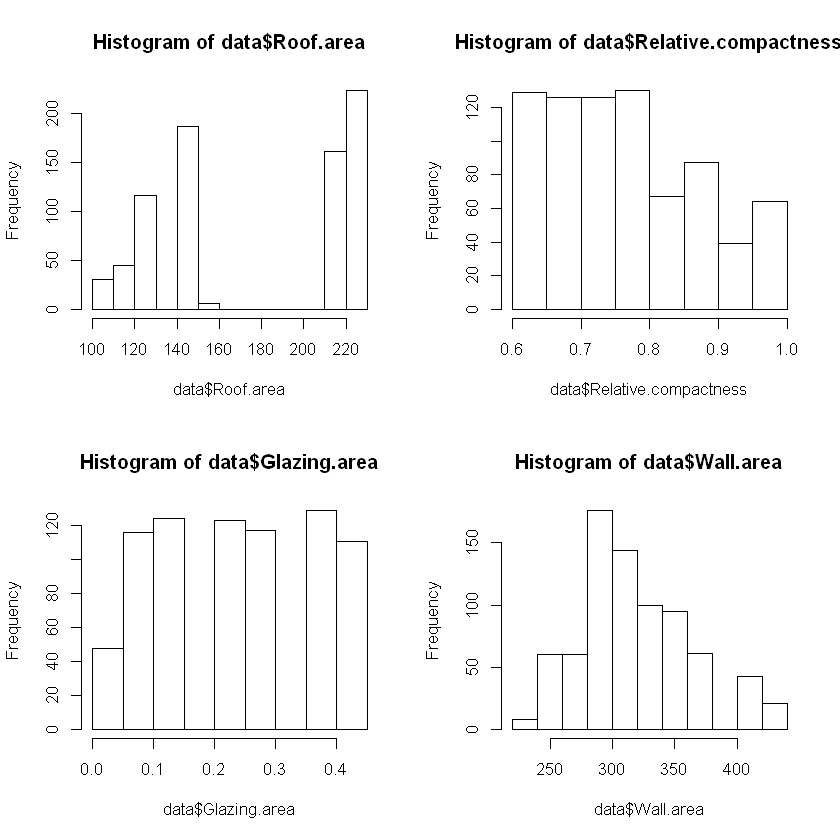

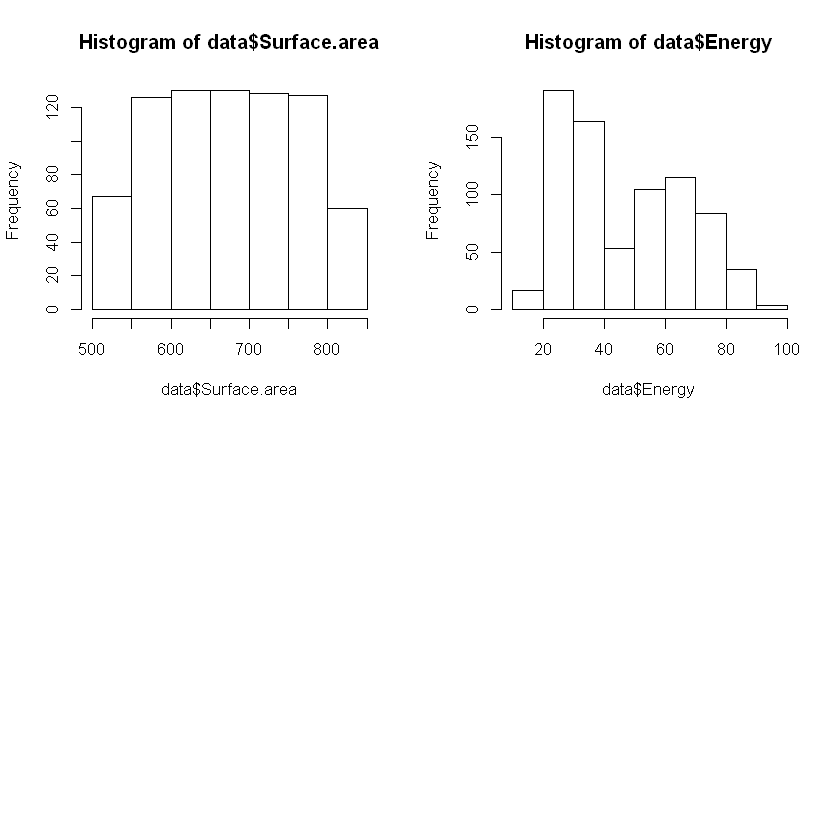

In [8]:
par(mfrow=c(2,2))
hist(data$Roof.area)
hist(data$Relative.compactness)
hist(data$Glazing.area)
hist(data$Wall.area)
hist(data$Surface.area)
hist(data$Energy)

Il semble que les valeurs de *Glazing.area* soient réparties autour de 4 valeurs. Les distributions de *Wall.area* et de *Energy* sont normales.

<FONT COLOR="Red">*On va devoir créer une quali pour Glazing.area avec des seuils.*

In [9]:
round(2*data[1:5,4]+data[1:5,3],2) == round(data[1:5,2],2)
data<-data[,-4]

[1] TRUE TRUE TRUE TRUE TRUE

Comme *Surface.area* = 2 x *Roof.area* + *Wall.area* et qu'il n'y a pas de valeur entre 160 et 210 pour *Roof.area*, nous décidons de supprimer cette variable.

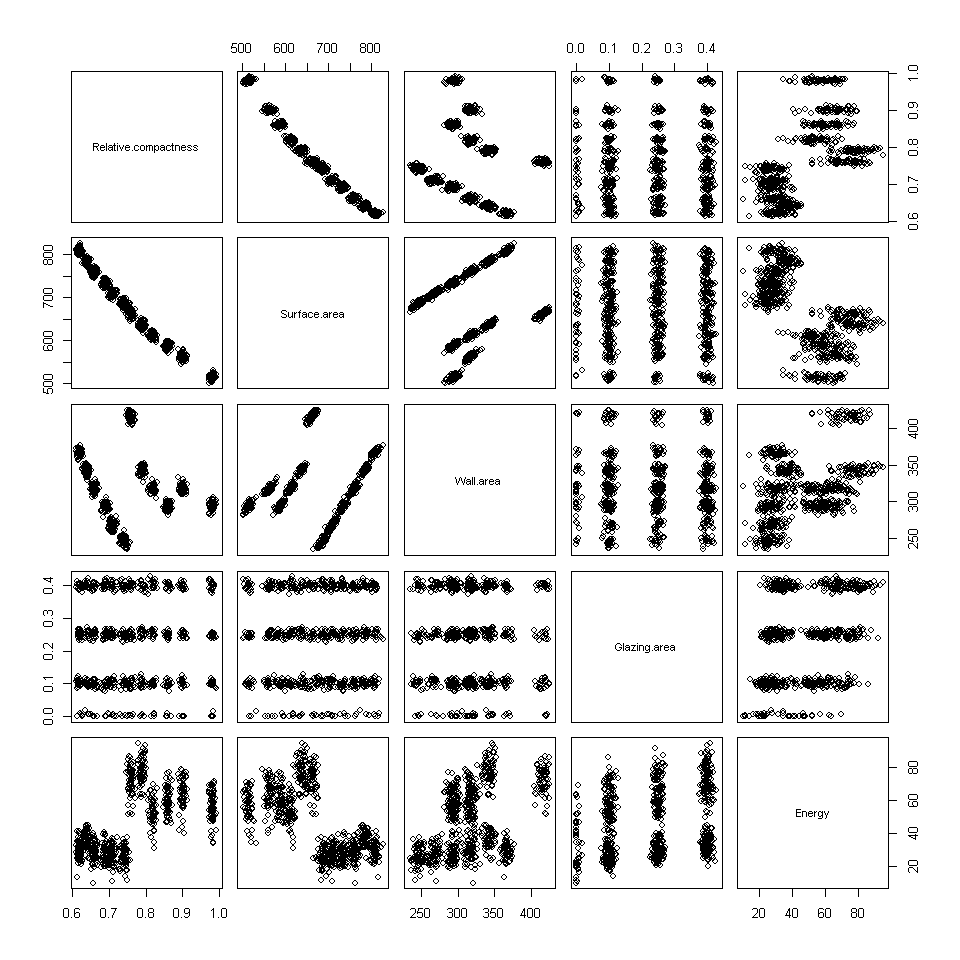

In [10]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(data[, -c(4,5,7,9)])

D'après ce graphe, les variables *Relative.compactness* et *Surface.area* sont très corrélées, négativement. *Wall.area* et *Relative.compactness* ont l'air liés, *Relative.compactness* décroit quand *Wall.area* augmente. *Relative.compactness* et *Energy* aussi, en effet quand *Energy* augmente, *Relative.compactness* passe à un seuil supérieur. Lorsque *Glazing.area* augmente, on remarque que *Energy* a tendance à augmenter légèrement. *Surface.area* et *Wall.area* ont l'air liés également, ce qui est logique d'après la relation évoquée précédemment. Enfin, quand *Surface.area* augmente, *Energy* passe à un seuil inférieur. Il est difficile de voir d'autres corrélations entre les variables quantitatives.

In [ ]:
library(corrplot)

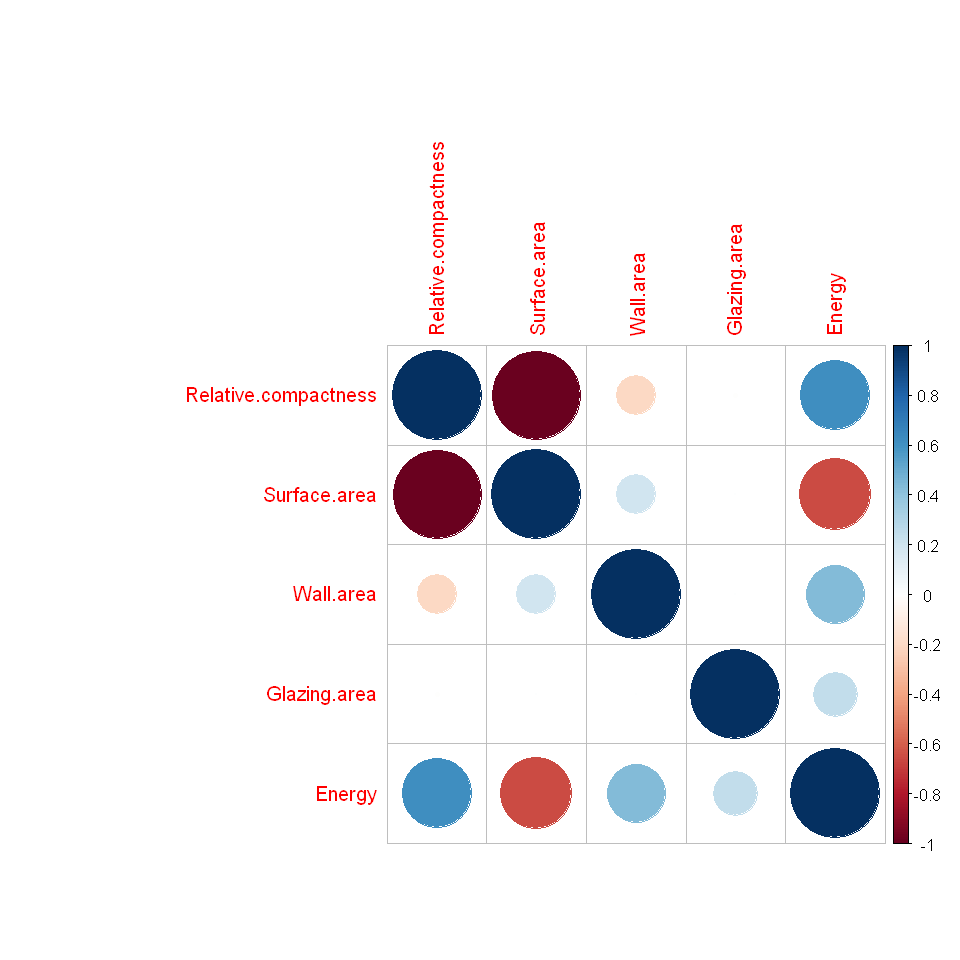

In [12]:
mat<-cor(data[,-c(4,5,7,9)])
corrplot(mat)

Dans ce corrplot on retrouve bien la corrélation négative entre *Relative.compactness* et *Surface.area*, et la corrélation positive entre *Relative.compactness* et *Energy*. La corrélation négative entre *Surface.area* et *Energy* est mise en avant aussi.

## Anlyse univariée et bivariée des variables qualitatives

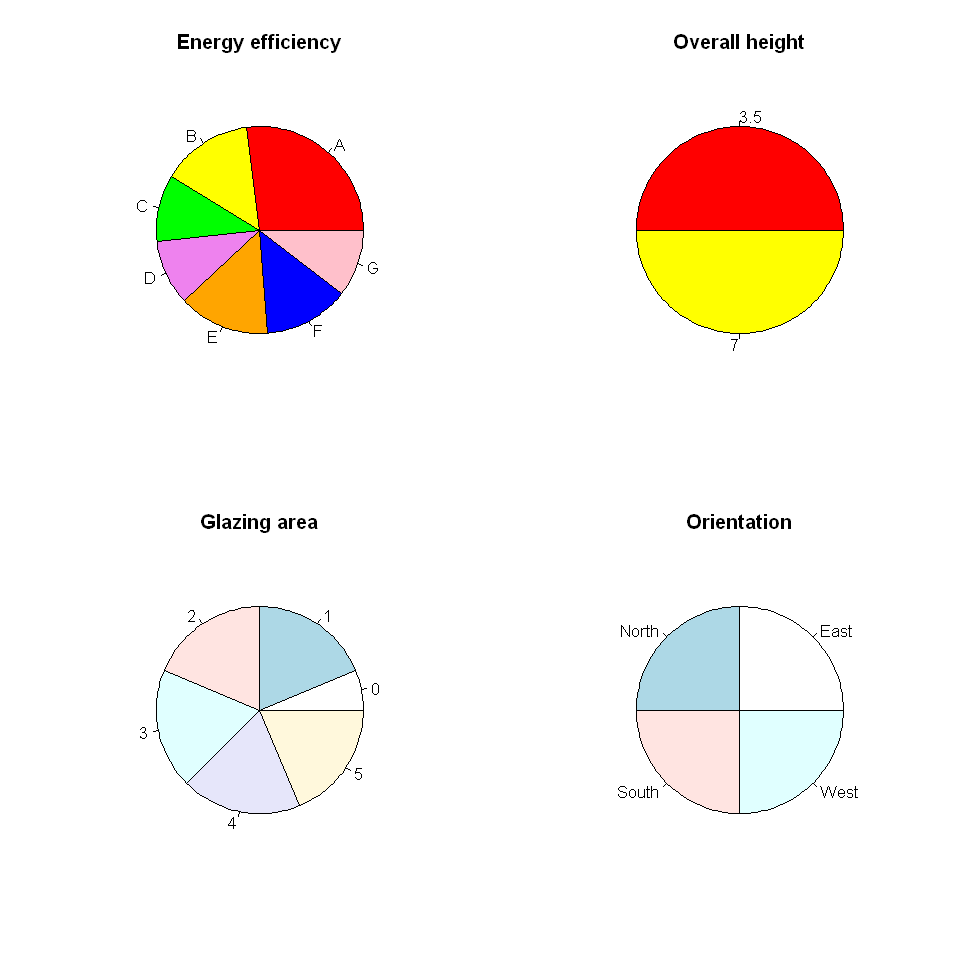

In [13]:
par(mfrow=c(2,2))
colors <- c("red", "yellow", "green", "violet","orange", "blue", "pink") 
pie(table(data$Energy.efficiency),col=colors, main="Energy efficiency")
pie(table(data$Overall.height),col=colors, main="Overall height")
pie(table(data$Glazing.area.distr), main="Glazing area")
pie(table(data$orientation),main="Orientation")

On remarque que la catégorie A est la plus présente pour *Energy.efficiency*. Pour *Overall.height*, la répartition entre 3.5 et 7 est équilibrée. Il y a peu de catégorie 0 dans *Glazing.area*, donc peu de bâtiments sans fenêtre. Les orientations sont également réparties de manière identique.

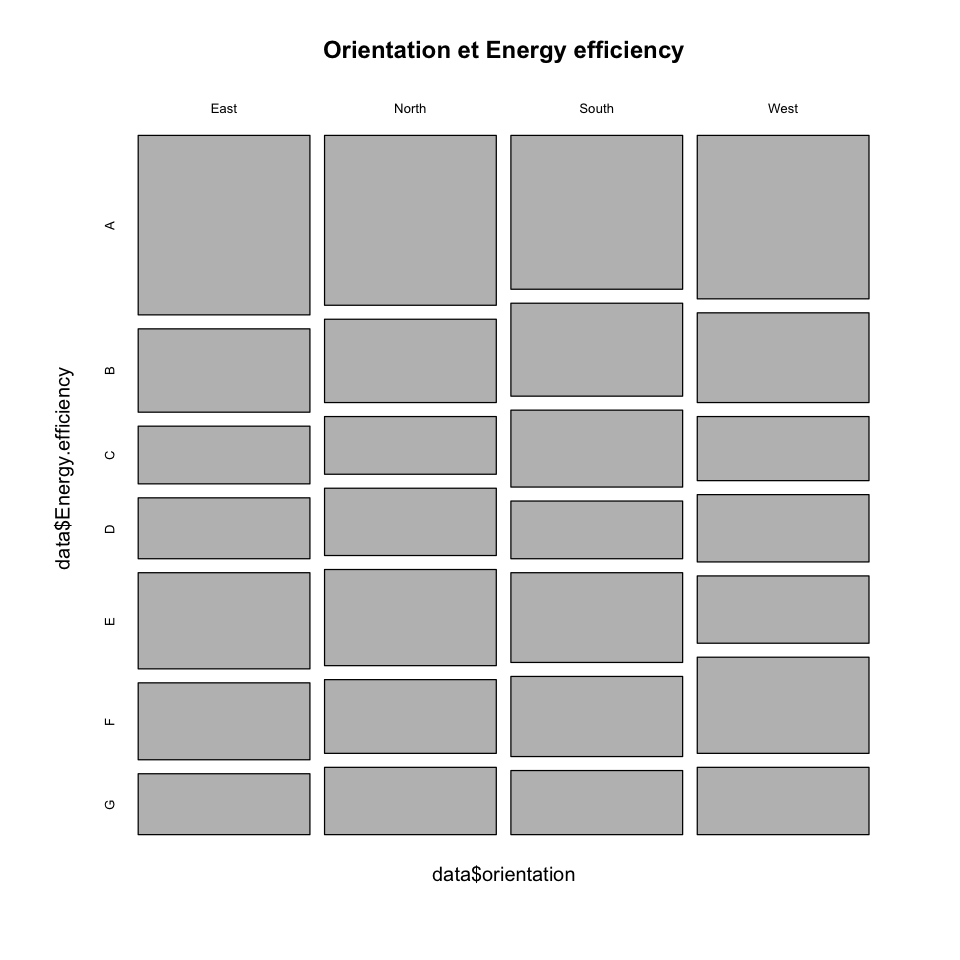

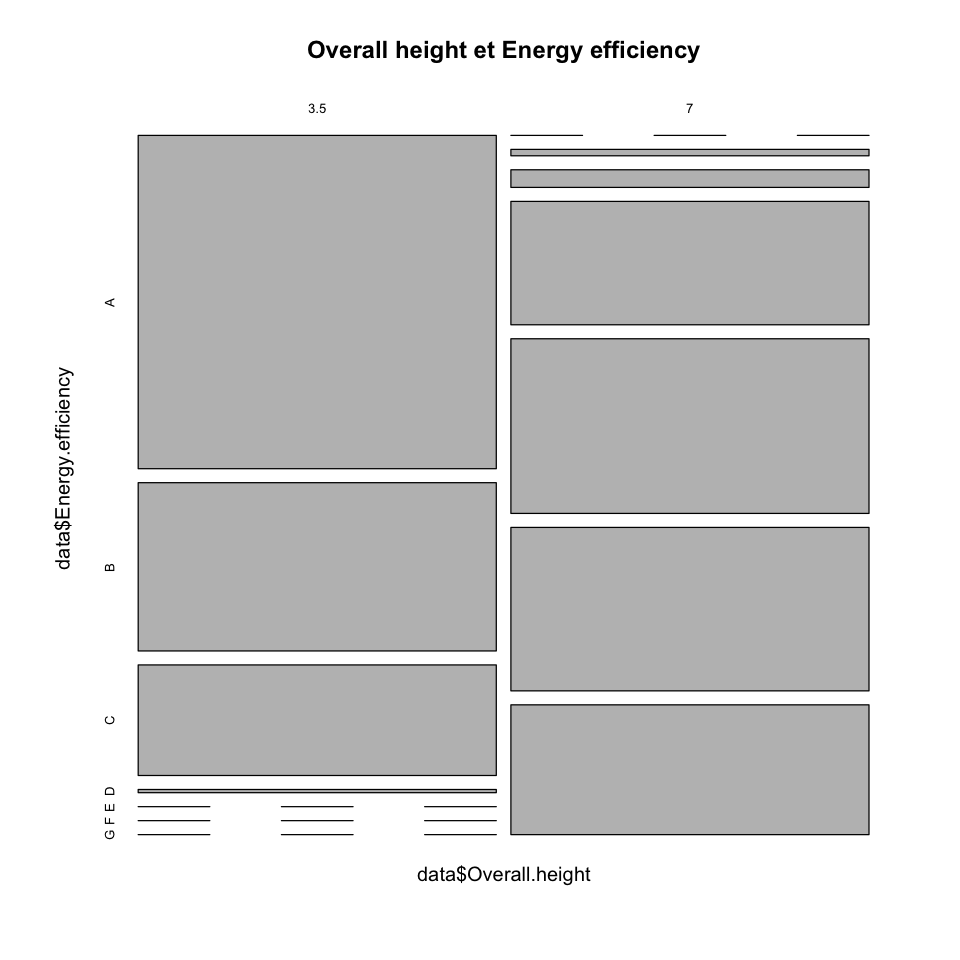

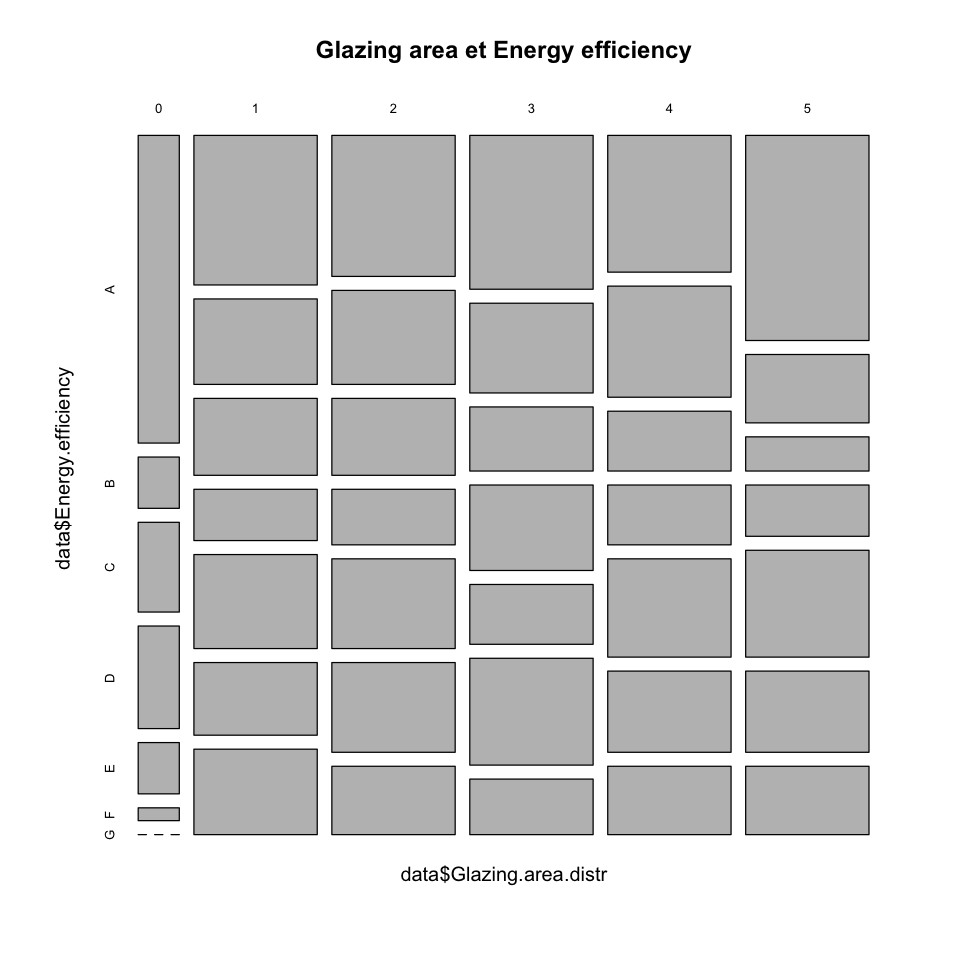

In [14]:
mosaicplot(data$orientation~data$Energy.efficiency, main="Orientation et Energy efficiency")
mosaicplot(data$Overall.height~data$Energy.efficiency,main="Overall height et Energy efficiency")
mosaicplot(data$Glazing.area.distr~data$Energy.efficiency,main="Glazing area et Energy efficiency")

On remarque une légère corrélation mais peu significative entre *Energy efficiency* et *Orientation*. Forte corrélation de *Energy efficiency* avec *Overall height* : pour les classes A,B,C c'est principalement la hauteur 3.5 alors que pour D,E,F,G c'est 7. Enfin, il y a corrélation aussi entre *Energy efficiency* et *Glazing area distr* : pour la classe 0 on remarque une grande différence, surtout du A en énérgie <FONT COLOR="Red">c'est à dire peu d'énergie/bonne performance énergétique.</font>

## Analyse bivariée variables quantitatives et qualitatives

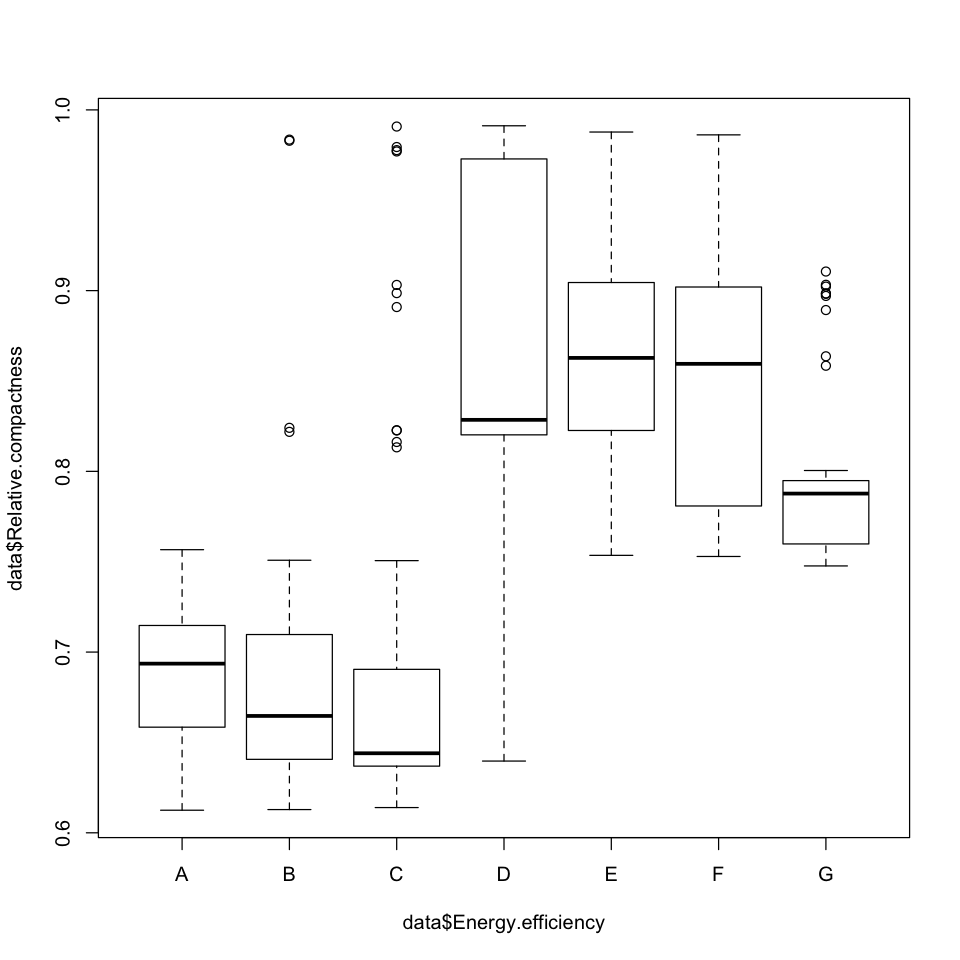

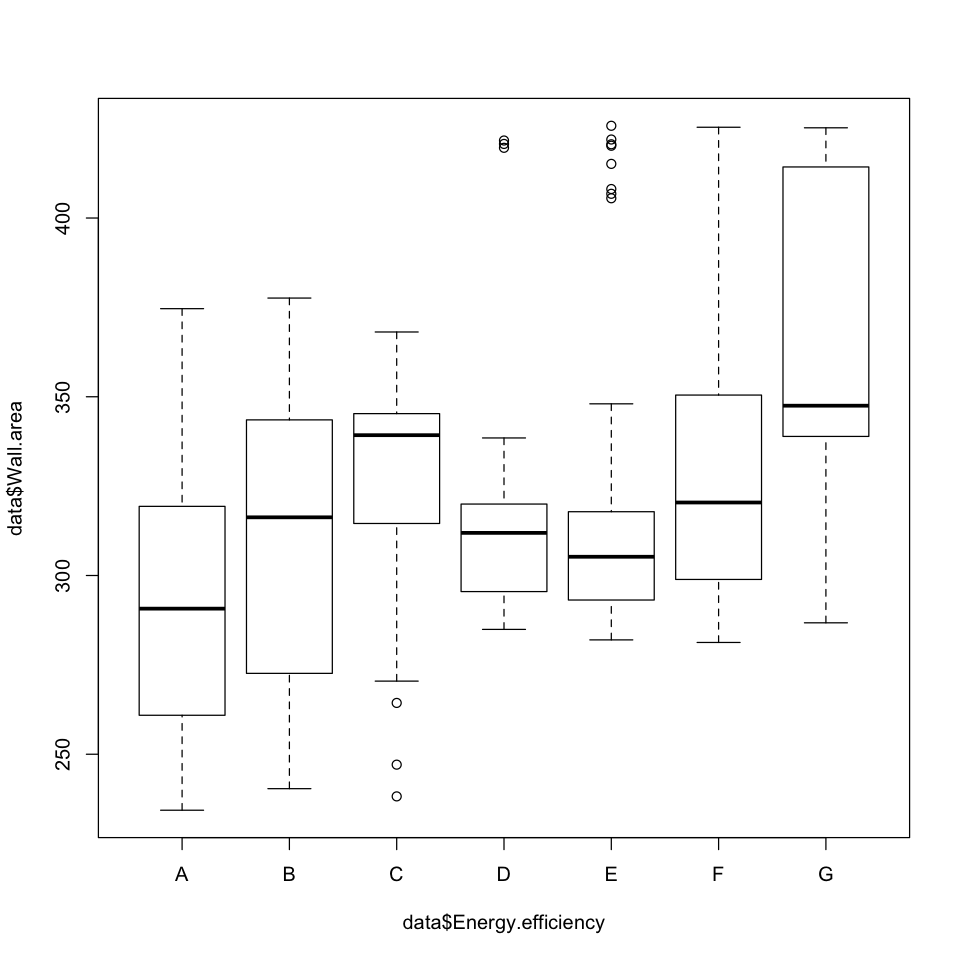

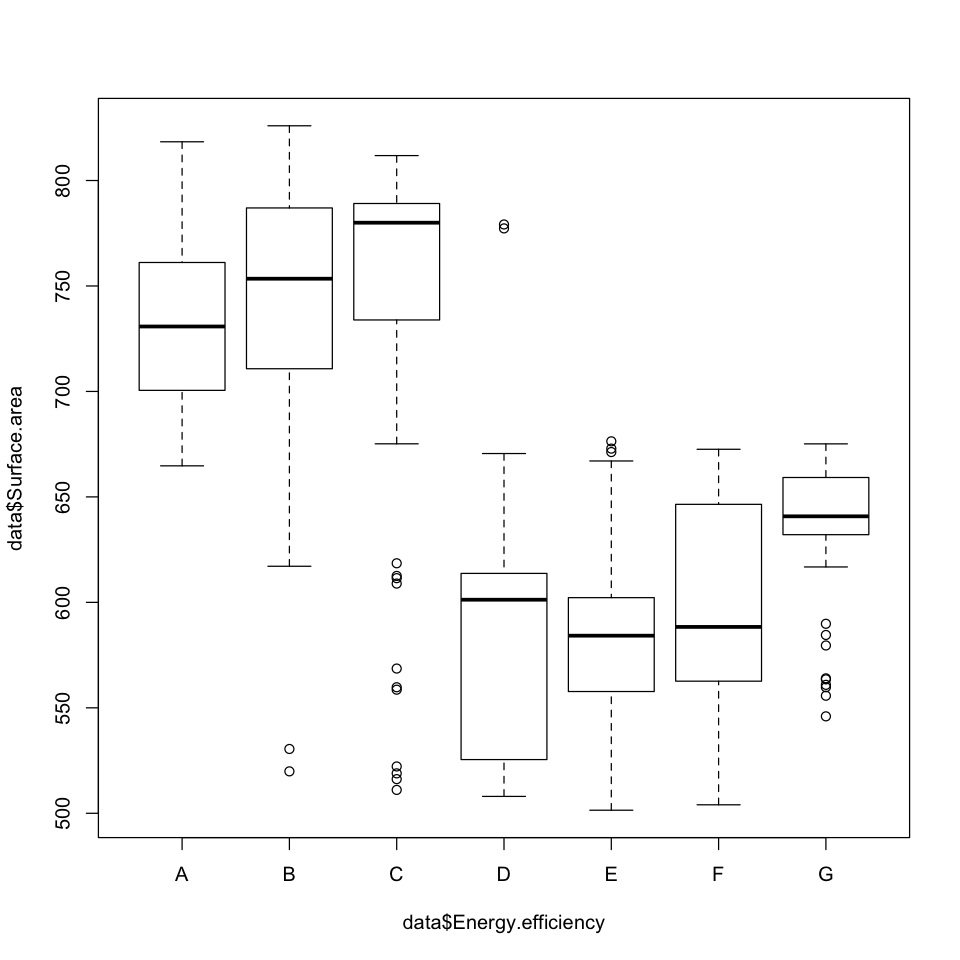

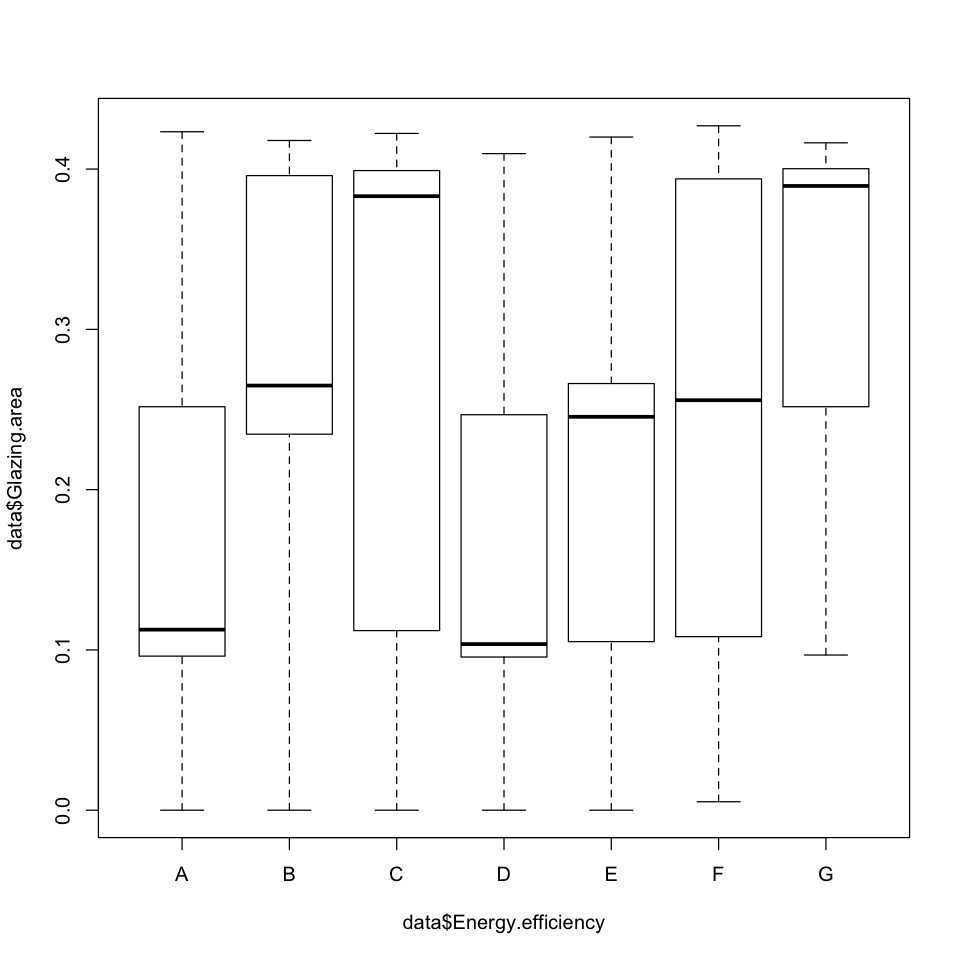

In [15]:
boxplot(data$Relative.compactness~data$Energy.efficiency)
boxplot(data$Wall.area~data$Energy.efficiency)
boxplot(data$Surface.area~data$Energy.efficiency)
boxplot(data$Glazing.area~data$Energy.efficiency)

Nous étudions ici les corrélations entre *Energy.efficiency* et les variables qualitatives. Entre *Energy.efficiency* et *Relative.compactness*, on retrouve un grand écart entre les premières classes A,B,C et les dernières classes donc il y a une forte corrélation, c'est également le cas avec *Surface.area*. On remarque une légère corrélation avec *Wall.area*. Enfin, pour *Glazing.area* on peut noter une grande disparité en fonction des classes donc une forte corrélation.

**Conclusion :** L'analyse nous a permis dans un premier temps de détecter et corriger des anomalies. Ensuite, l'analyse multivariée a mis en avant les corrélations entre les variables.

# ACP

Après avoir nettoyé les données, corriger les anomalies et analyser les corrélations entre les différentes variables, l'ACP nous permet de mieux **visualiser** le jeu de données en dégageant ses **grandes tendances**. Le but de cette méthode est de pouvoir trouver des variables "synthétiques" (les composantes du cercle de corrélation), qui regroupent plusieurs variables. Une fois celles-ci trouvée, 

In [16]:
library("FactoMineR")

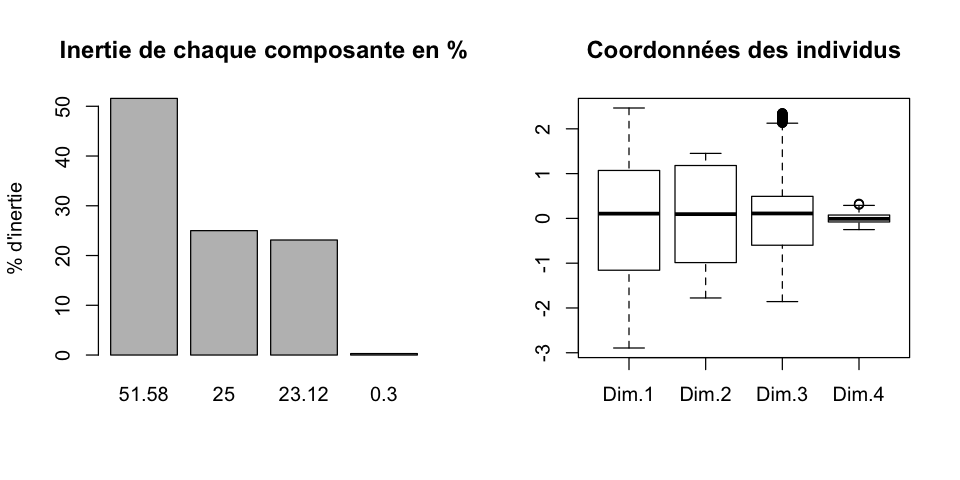

In [17]:
acp<-PCA(data,scale.unit=TRUE,graph=FALSE,quanti.sup=8, quali.sup=c(4,5,7,9))
par(mfrow=c(1,2))
options(repr.plot.width = 8, repr.plot.height = 4)
barplot(acp$eig[,2],ylab="% d'inertie", names.arg=round(acp$eig[,2],2))
title("Inertie de chaque composante en %")
boxplot(acp$ind$coord, main = "Coordonnées des individus")

Nous pouvons voir en analysant le barplot que garder 2 composantes nous permet d'avoir un peu moins de 80% d'information contenue dans les données. 
Les coordonnées des individus sont très dispersées pour les trois premières composantes.

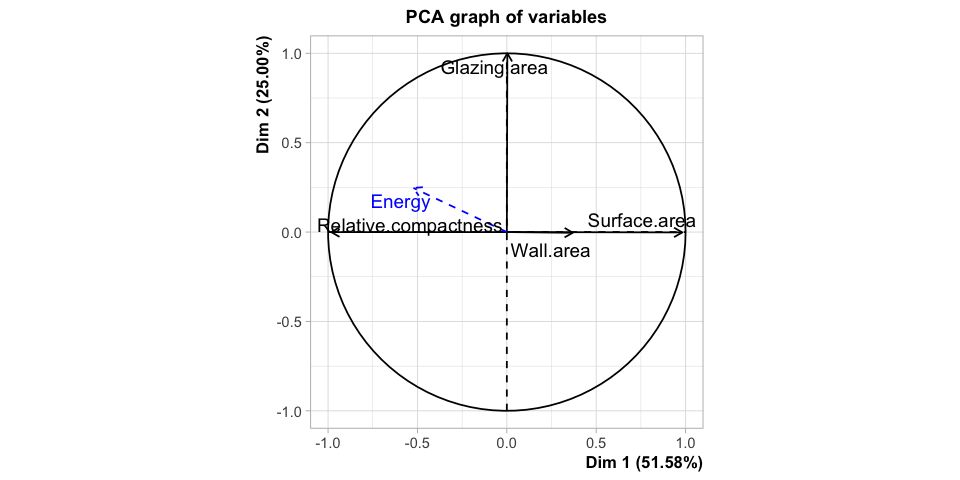

In [18]:
plot(acp, choix = "varcor")

In [19]:
print(acp$var$coord,digit=1)

                      Dim.1  Dim.2  Dim.3 Dim.4
Relative.compactness -0.982 -4e-04  0.173 8e-02
Surface.area          0.981 -2e-03 -0.176 8e-02
Wall.area             0.369 -4e-03  0.929 2e-04
Glazing.area          0.003  1e+00  0.003 2e-04


Nous pouvons voir que toutes les variables quantitatives sont très bien représentées sur le cercle de corrélation, exceptée *Wall.area*. Cette variable n'est bien représentée que sur la troisième composante, comme nous permet de le confirmer la lecture du tableau des coordonnées des variables dans le cercle. *On déduit que le premier axe porte quel sens?* la performance énergétique ? yes je pense que t'as raison <FONT COLOR="Red">Du coup je suis pas tropsûre de ce que veulent dire les axes, ça serait peut être plutôt l'opposé de la performance sur l'axe 1 parce que quand surface augmente, energy baisse... et l'axe 2 un peu mystère à  part la surface vitrée quoi.</font>

In [20]:
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Relative.compactness: num  0.983 0.984 0.979 0.978 0.903 ...
 $ Surface.area        : num  530 520 516 519 553 ...
 $ Wall.area           : num  306 300 303 293 316 ...
 $ Overall.height      : Ord.factor w/ 2 levels "3.5"<"7": 2 2 2 2 2 2 2 2 2 2 ...
 $ orientation         : Factor w/ 4 levels "East","North",..: 2 1 3 4 2 1 3 4 2 1 ...
 $ Glazing.area        : num  1.61e-02 0.00 0.00 9.55e-06 0.00 ...
 $ Glazing.area.distr  : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Energy              : num  34.3 34.6 38.8 37.9 47.7 ...
 $ Energy.efficiency   : Factor w/ 7 levels "A","B","C","D",..: 2 2 3 3 4 3 3 3 4 4 ...


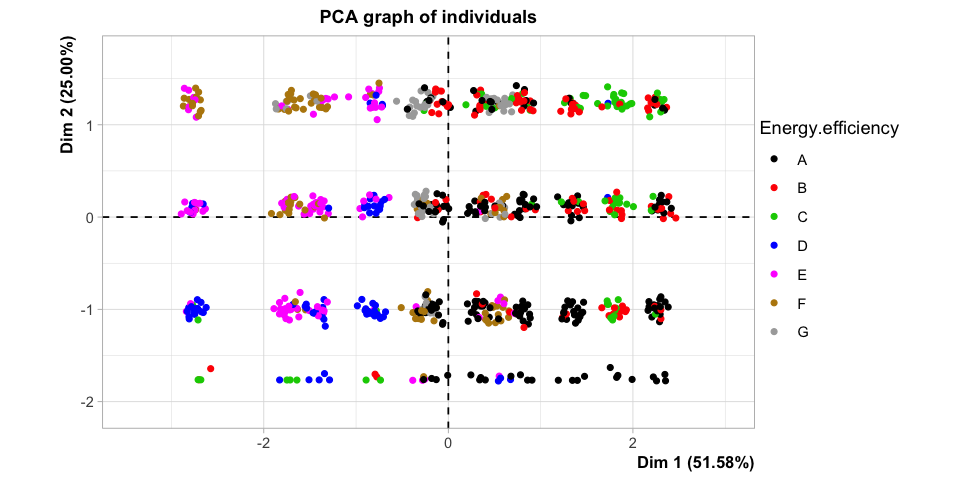

In [21]:
plot(acp, choix = "ind", habillage = "Energy.efficiency",invisible="quali",label="none")

Nous pouvons d'ores et déjà affirmer que les "clusters" du graphe des individus, correspondent bien aux différents niveau d'efficacité énergétique. 
Les bâtiments à gauche du graphe sont des bâtiments qui ont une petite superficie et une grande compacité. Ces bâtiments ont une efficacité énergétique élevée (D,E,F et G). 
*POur ce qui est de l'axe 2, les individus sont assez représentés tout au long de l'axe sans différence de clusters, sauf un groupe de batiments à faible efficacité d'énergie qui est assez haut dans le cercle.*

# Clustering

Le clustering est une autre méthode de classification non supervisée des variables qui est intéressante à utiliser, notamment après une ACP, pour compléter l'interprétation. 

In [22]:
summary(data)

 Relative.compactness  Surface.area     Wall.area     Overall.height
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   3.5:384       
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   7  :384       
 Median :0.7517       Median :673.1   Median :315.8                 
 Mean   :0.7645       Mean   :671.3   Mean   :318.3                 
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0                 
 Max.   :0.9912       Max.   :826.0   Max.   :425.8                 
                                                                    
 orientation  Glazing.area    Glazing.area.distr     Energy     
 East :192   Min.   :0.0000   0: 48              Min.   :10.21  
 North:192   1st Qu.:0.1031   1:144              1st Qu.:29.36  
 South:192   Median :0.2475   2:144              Median :41.76  
 West :192   Mean   :0.2345   3:144              Mean   :46.92  
             3rd Qu.:0.3912   4:144              3rd Qu.:64.33  
             Max.   :0.4270   5:144              Max.   :9

In [23]:
d <- dist(data[,c(1:3,6)],method="euclidean")

In [24]:
dendo <- hclust(d,method="ward.D2")

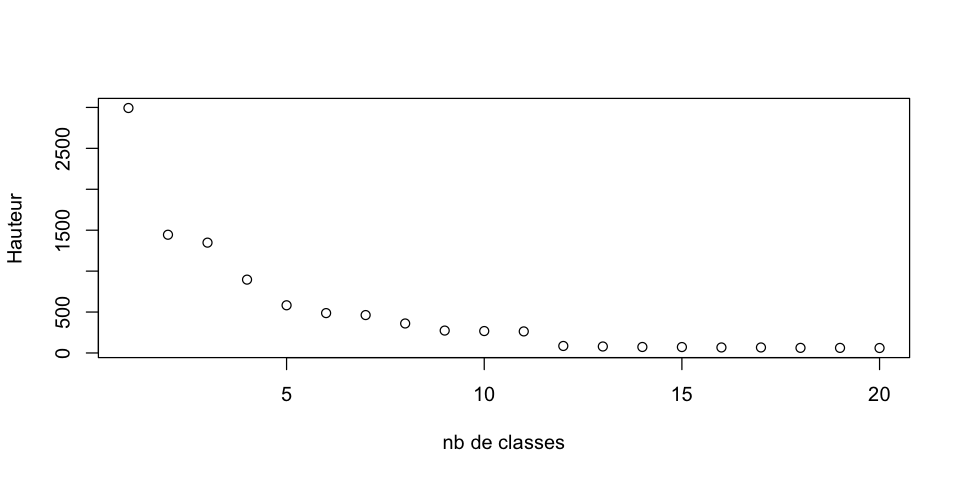

In [25]:
plot(sort(dendo$height,decreasing=TRUE)[1:20], xlab = "nb de classes", ylab = "Hauteur")

Le graphe ci-dessus représente la décroissance de la distance interclasse en fonction du nombre de classes. Il se lit de droite à gauche et permet de choisir le nombre de classes à considérer en prêtant attention aux sauts significatifs. Nous choisissons de garder 5 classes, car il précède un saut significatif. En suivant le même raisonnement nous aurions pu en choisir 4 aussi.  

Nous affichons le dendogramme avec les cinq classes délimitées par les traits rouges. 

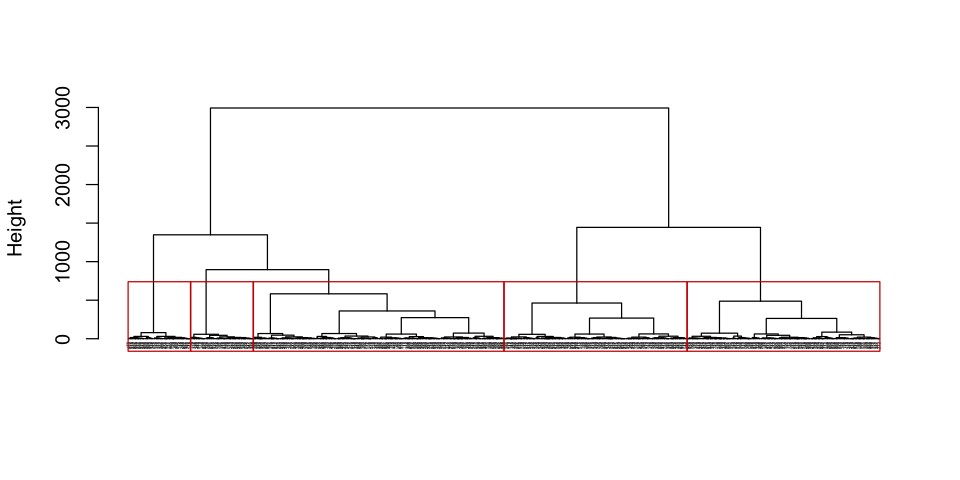

In [26]:
plot(dendo, main = NULL, sub = "", xlab = "",hang=-1,cex=0.2)
rect.hclust(dendo, 5, border = "red3")

In [27]:
#Les différents bâtiments et leur appartenance à un groupe
groupes.cah <- cutree(dendo,k=5)

Pour faciliter l'interprétation des cinq groupes, nous choisissons de calculer pour chaque variable, leur moyenne avec le code ci-dessous. 

In [28]:
tab<-data[,-c(4,5,7,9)]
k=5
p=ncol(tab)
matmoy=matrix(0,k+1,p)
for (i in 1:p) matmoy[1:k,i]=tapply(tab[,i],groupes.cah,mean,na.rm=TRUE)
matmoy[k+1,]=apply(tab,2,mean,na.rm=TRUE) # ajout moyennes des variables sans classes
row.names(matmoy)=c(paste("Classe",1:k),"Ensemble")
colnames(matmoy)=colnames(tab)
matmoye=cbind(round(matmoy,digits=3),effectifs=c(table(groupes.cah),sum(table(groupes.cah)))) # ajout effectifs
print(matmoye)

         Relative.compactness Surface.area Wall.area Glazing.area Energy
Classe 1                0.980      514.600   294.210        0.233 56.994
Classe 2                0.843      599.801   318.357        0.235 64.240
Classe 3                0.760      662.219   417.083        0.234 72.179
Classe 4                0.713      710.499   270.250        0.233 27.230
Classe 5                0.640      784.827   343.408        0.236 31.874
Ensemble                0.765      671.350   318.332        0.235 46.924
         effectifs
Classe 1        64
Classe 2       256
Classe 3        64
Classe 4       197
Classe 5       187
Ensemble       768


Au vu du tableau, nous remarquons que le groupe 1 possède en moyenne, la plus petite valeur de superficie (*Surface.area*)

Le graphe ci-dessous représente l'ACP avec les cinq groupes obtenus par la méthode *hclust*.

In [29]:
library("devtools")
library("factoextra")

Loading required package: usethis
Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


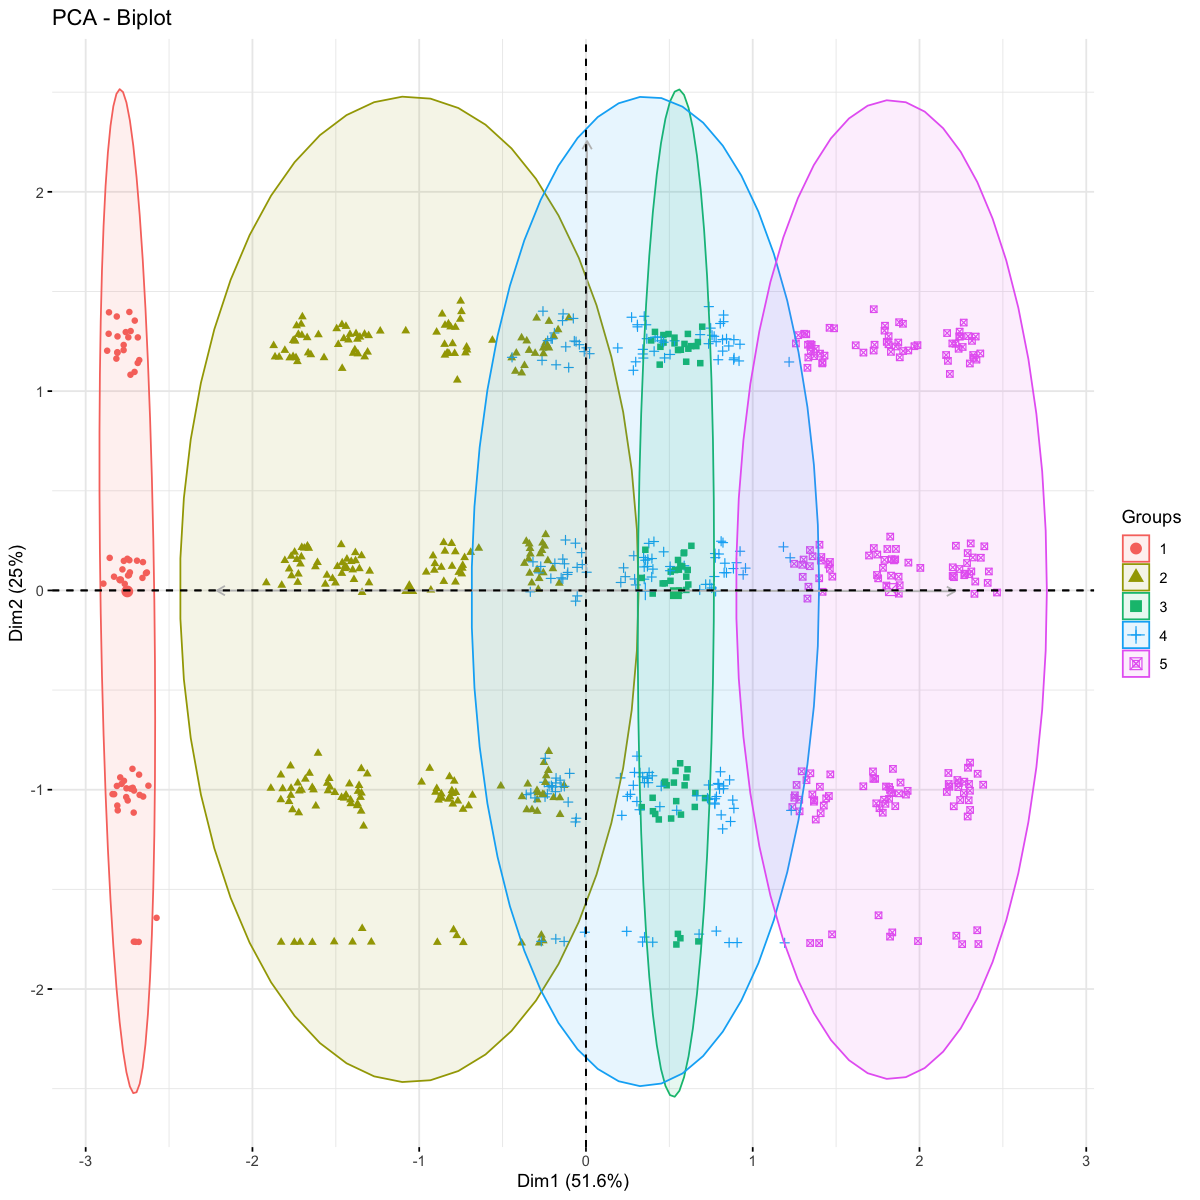

In [30]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_biplot(acp, 
                col.var = "grey",
                habillage = as.factor(groupes.cah), 
                col.quanti.sup = "red",
                col.circle = "darkslategrey",
                addEllipses = TRUE,select.var = list(cos2 = 0.7, contrib=30),label="none" 
                )

In [61]:
library(ggplot2)
#library(factoextra)
library(stringr)
library(kml)
library(tidyr)
#install.packages("RColorBrewer")
library(gplots)
library(RColorBrewer)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'kml' was built under R version 3.6.3"Loading required package: clv
Warning message:
"package 'clv' was built under R version 3.6.3"Loading required package: cluster
Loading required package: class
Loading required package: longitudinalData
Warning message:
"package 'longitudinalData' was built under R version 3.6.3"Loading required package: misc3d
Warning message:
"package 'misc3d' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:Matrix':

    expand

Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [62]:
install.packages("pkgs")

Warning message:
"package 'pkgs' is not available (for R version 3.6.1)"

In [63]:
install.packages("kml")

Warning message:
"package 'kml' is in use and will not be installed"

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


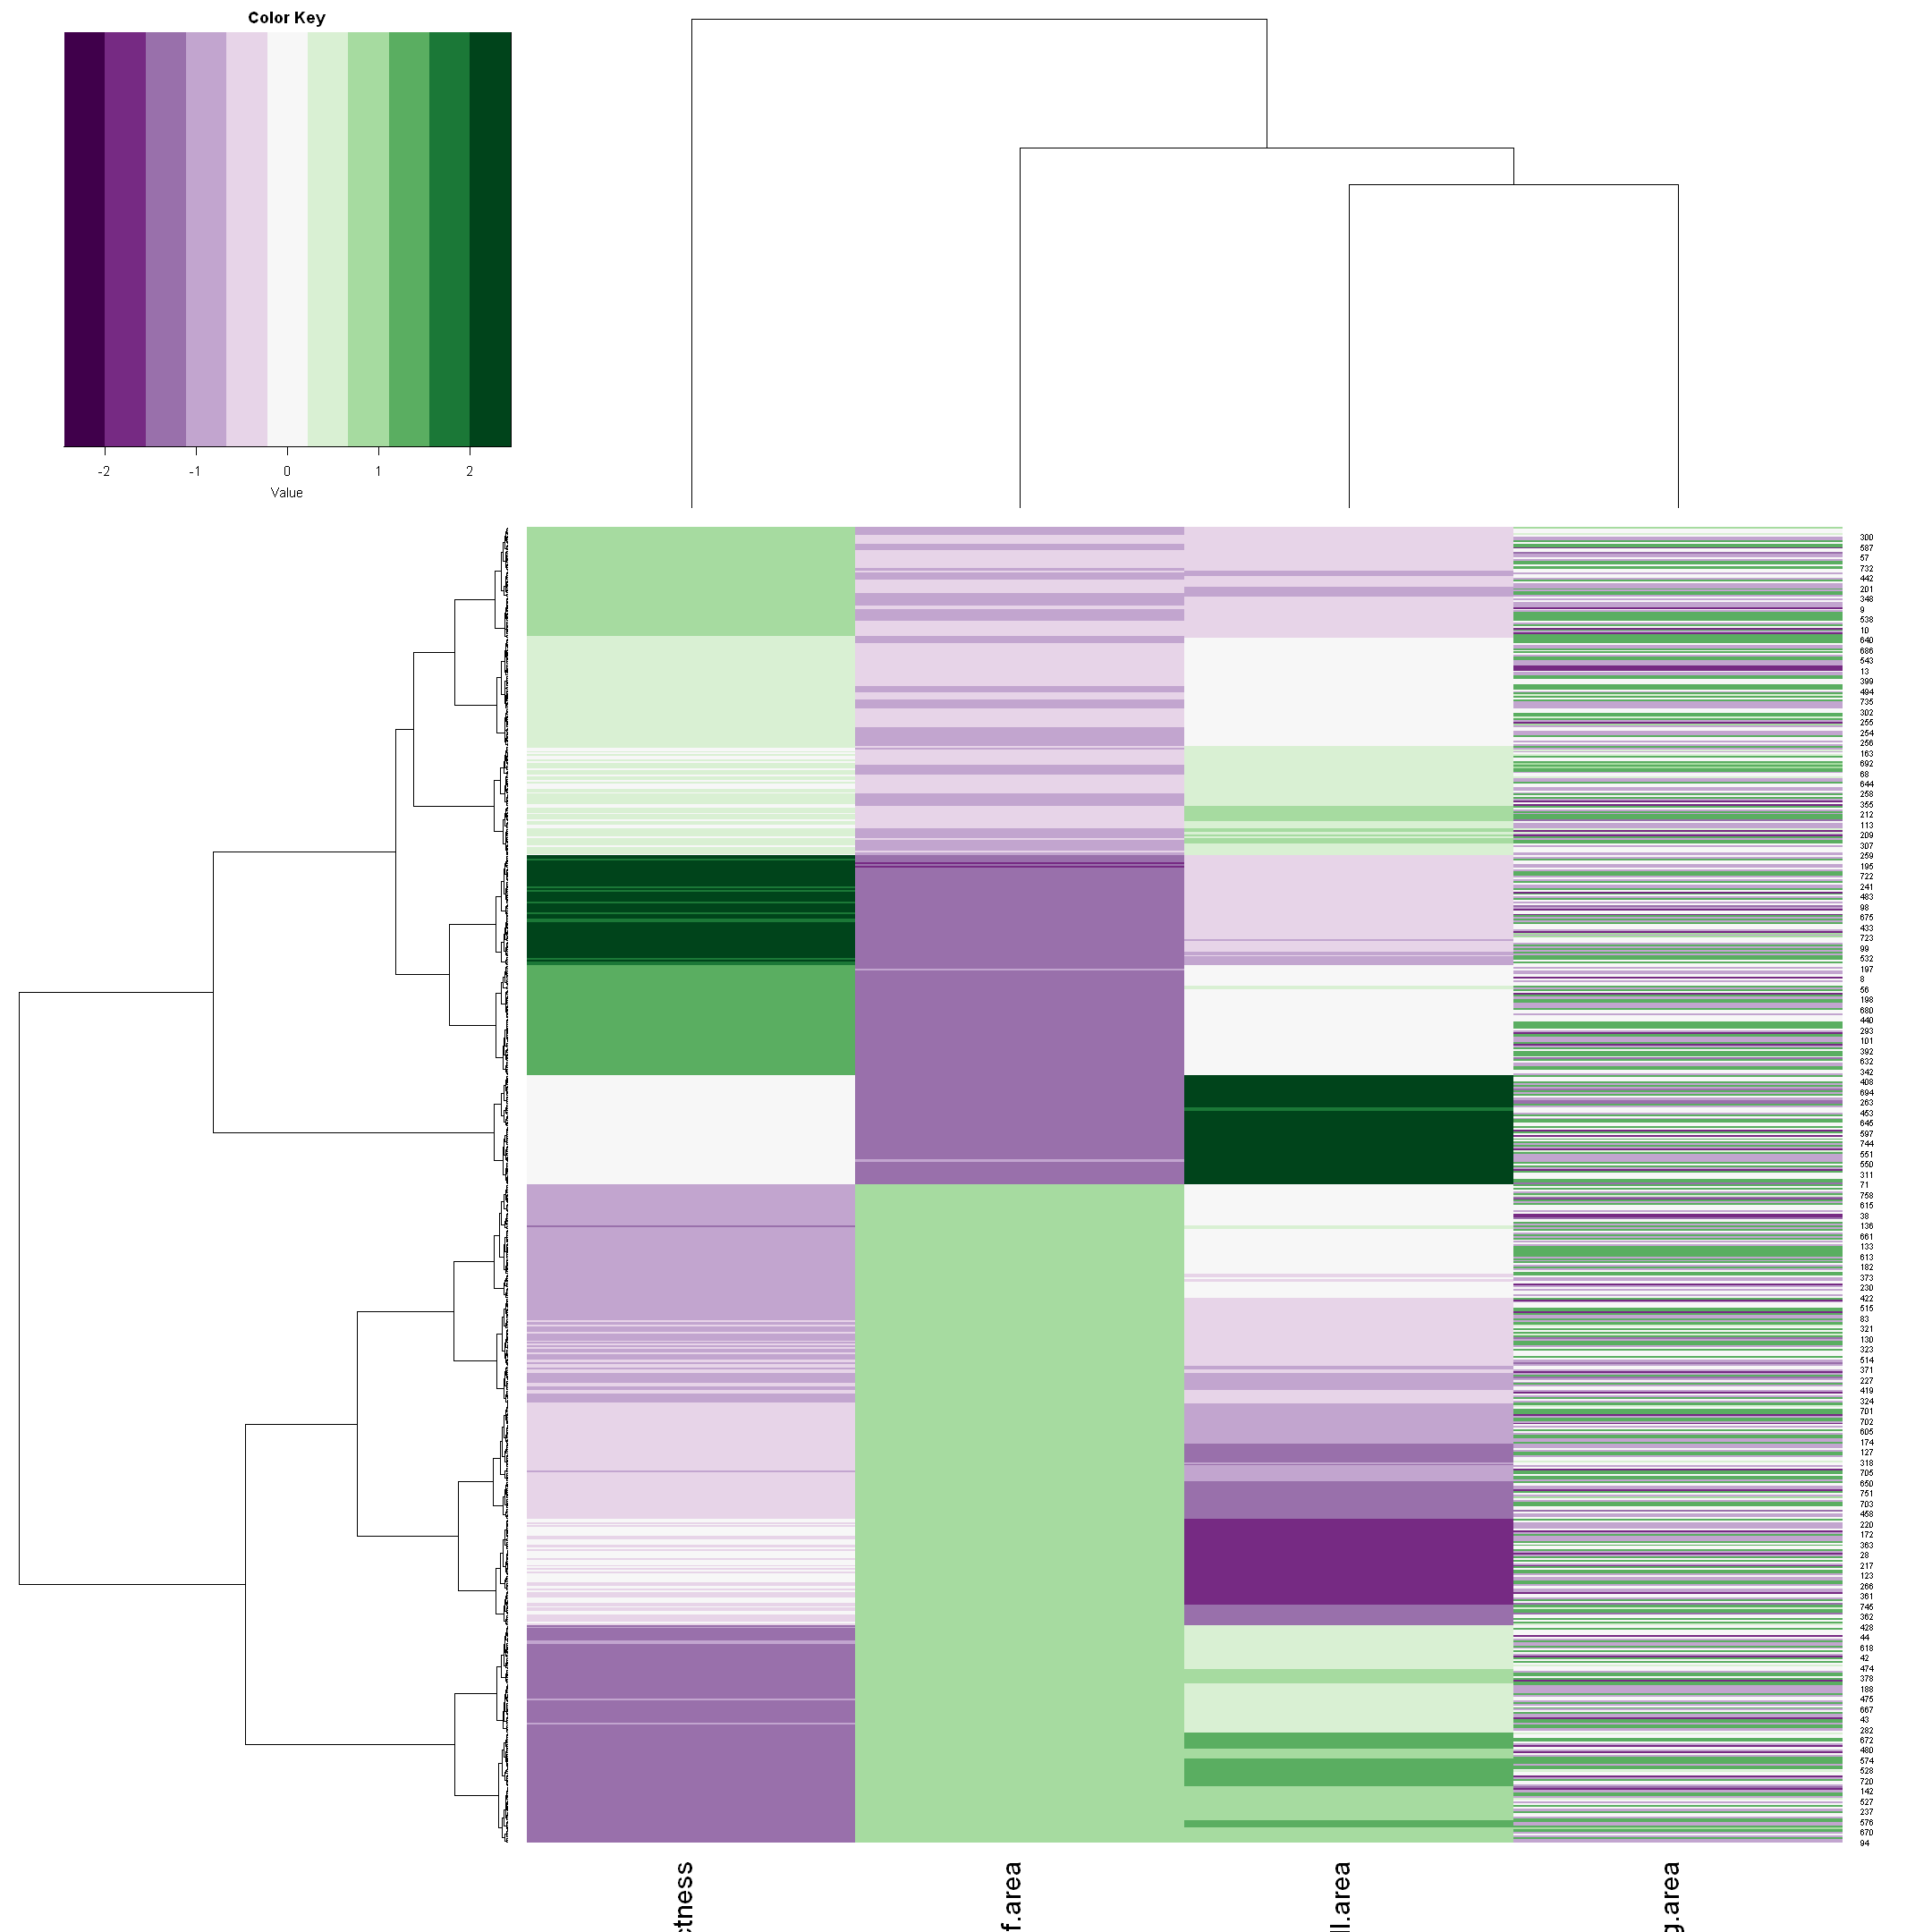

In [65]:
#HEATMAP
library(factoextra)
dist.var_var <- get_dist(t(data[,c(1:3,6)]), method='spearman')
clas.var_var <- hclust(dist.var_var, method="ward.D")
color_var = cutree(clas.var_var,k=4)
options(repr.plot.width=18, repr.plot.height=18)

heatmap.2(as.matrix(scale(data[,c(1:3,6)])), Rowv = as.dendrogram(dendo), 
          Colv = as.dendrogram(clas.var_var), scale='none', col=brewer.pal(n = 11, name = "PRGn"), 
          density.info="none", trace="none")

*Interprétation?*  
Le heatmap est une méthode de visualisation du clustering. Nous retrouvons en plus des clusters, les variables en "abscisse" et tous les bâtiments à droite.
L'amplitude des valeurs des variables est caractérisée par une plage de couleur. Plus une cellule est verte plus la valeur de la variable en question est élevée. Au contraire, plus une cellule est violette, plus la valeur de la variable est faible.  


la 1ere moitié des batiments négatifs par rapport à roof area et la 2e positif, l'inverse pour relative compactness. POur les 2 autres variables c'est difficile à dire. *et y a pas les quali?* bonne question.. à chercher

**Conclusion de la partie Exploratoire des données :** L’exploration des données nous a permis dans un premier temps de détecter et corriger des anomalies. L'étude de la distribution des variables quantitatives nous a permis de remarquer que chaque modalité était bien représentée dans le jeu de données. Ensuite, l'analyse multivariée nous a permis de déceler les relations entre les variables.   

# Modèles 

La fonction ci-dessous nous sera utile pour les modèles de régression. A partir des prévisions d'énergie (modèle de régression), elle nous permet d'obtenir les classes équivalentes.

In [45]:
thresh<-function(pred){
    p=cut(pred, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  labels = c("A", "B", "C", "D", "E", "F", "G"))
    p}

## Extraction des échantillons

In [46]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

Construction des échantillons pour la prévision d'énergie (problème de **régression**) 

In [47]:
# construction de l'échantillon d'apprentissage
datappr <- data[appri, -9] 
# construction de l'échantillon test
datestr <- data[testi, -9] 
summary(datappr) # vérification

 Relative.compactness  Surface.area     Wall.area     Overall.height
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   3.5:304       
 1st Qu.:0.6794       1st Qu.:597.6   1st Qu.:292.6   7  :310       
 Median :0.7526       Median :672.5   Median :315.9                 
 Mean   :0.7647       Mean   :671.6   Mean   :319.6                 
 3rd Qu.:0.8526       3rd Qu.:744.5   3rd Qu.:343.7                 
 Max.   :0.9908       Max.   :826.0   Max.   :425.4                 
 orientation  Glazing.area    Glazing.area.distr     Energy     
 East :150   Min.   :0.0000   0: 38              Min.   :10.21  
 North:150   1st Qu.:0.1031   1:114              1st Qu.:29.66  
 South:156   Median :0.2462   2:115              Median :42.15  
 West :158   Mean   :0.2339   3:113              Mean   :47.23  
             3rd Qu.:0.3914   4:117              3rd Qu.:64.33  
             Max.   :0.4222   5:117              Max.   :94.84  

Construction des échantillons pour la prévision de la catégorie d'efficacité énergétique (problème de **discrimination**)

In [48]:
# construction de l'échantillon d'apprentissage
datappq <- data[appri,-8]
# construction de l'échantillon test 
datestq <- data[testi,-8] 
summary(datappq) # vérification

 Relative.compactness  Surface.area     Wall.area     Overall.height
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   3.5:304       
 1st Qu.:0.6794       1st Qu.:597.6   1st Qu.:292.6   7  :310       
 Median :0.7526       Median :672.5   Median :315.9                 
 Mean   :0.7647       Mean   :671.6   Mean   :319.6                 
 3rd Qu.:0.8526       3rd Qu.:744.5   3rd Qu.:343.7                 
 Max.   :0.9908       Max.   :826.0   Max.   :425.4                 
                                                                    
 orientation  Glazing.area    Glazing.area.distr Energy.efficiency
 East :150   Min.   :0.0000   0: 38              A:161            
 North:150   1st Qu.:0.1031   1:114              B: 87            
 South:156   Median :0.2462   2:115              C: 67            
 West :158   Mean   :0.2339   3:113              D: 64            
             3rd Qu.:0.3914   4:117              E: 89            
             Max.   :0.4222   5:117           

Question 1 : This step is necessary when we focus on performance because ?  
Le partitionnement du jeu de données en jeu de test et jeu d'apprentissage permet de garder une partie pour l'apprentissage du modèle par l'algorithme et une partie pour l'évaluation de la performance du modèle obtenu. L'algorithme apprend donc sur les données d'apprentissage seulement. Ainsi, le jeu de test permet d'avoir, par la suite, une bonne approximation de l'erreur du modèle sur de nouvelles données car l'algorithme ne les aura jamais "vu".

## Modèle linéaire

In [49]:
tauxErr=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}

In [54]:
Accuracy=function(tab){sum(diag(tab))/sum(tab)}

### Regression

*Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.*

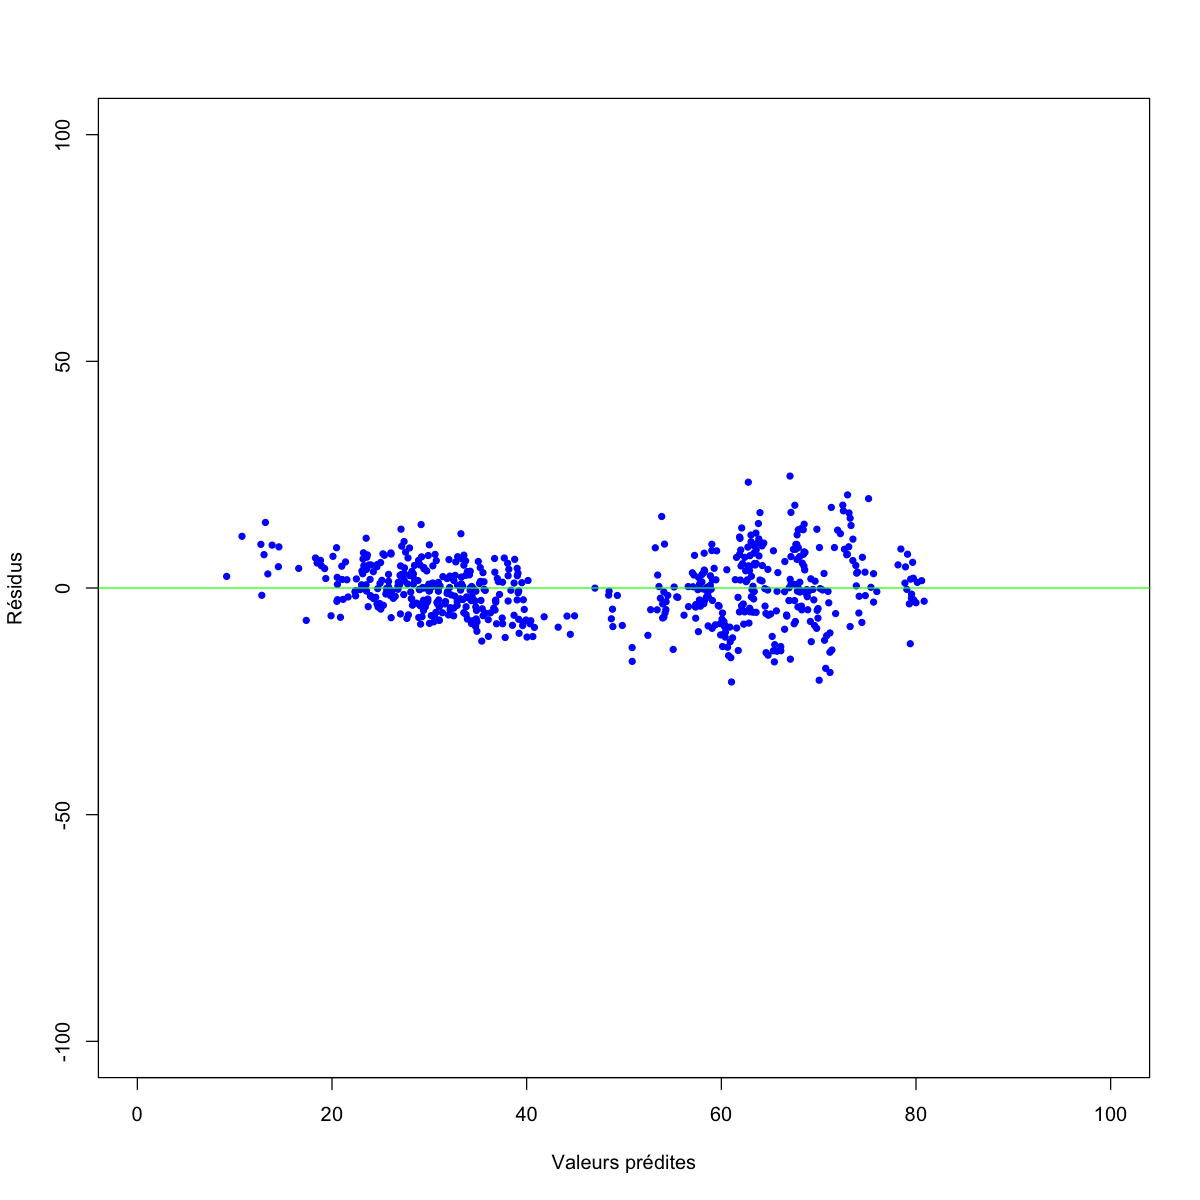

In [50]:
#test
# estimation du modèle sans interaction
reg.lm <- aov(Energy ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# graphe des résidus. 
# Définition d'une fonction pour un graphe coloré 
# et des échelles fixes sur les axes
plot.res <- function(x,y,titre="titre")
{
plot(x, y, col = "blue", xlim = c(0, 100), ylim = c(-100, 100),
ylab = "Résidus", xlab = "Valeurs prédites", main = titre, pch = 20)
# points(x2, y, col="red")
abline(h = 0, col = "green")
}
plot.res(fit.lm,res.lm,"")

Les résidus sont centrés autour de 0. Nous remarquons que la dispersion des erreurs est plus dispersé pour des valeurs prédites supérieures à 60. 

In [51]:
summary(reg.lm)

                      Df Sum Sq Mean Sq  F value Pr(>F)    
Relative.compactness   1  90332   90332 1880.520 <2e-16 ***
Surface.area           1  20741   20741  431.792 <2e-16 ***
Wall.area              1  78010   78010 1624.009 <2e-16 ***
Overall.height         1   7586    7586  157.929 <2e-16 ***
orientation            3    124      41    0.862  0.461    
Glazing.area           1  15660   15660  326.002 <2e-16 ***
Glazing.area.distr     5   1363     273    5.674  4e-05 ***
Residuals            600  28821      48                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

La p-valeur est élevée pour *orientation*. Cette variable ne serait donc pas significativement liée à *Energy*.

In [57]:
rglm<-table(thresh(fit.lm),datappq[,"Energy.efficiency"])
print(rglm)
paste("Accuracy =",round(Accuracy(rglm),3))
paste("Taux d erreur :",tauxErr(rglm))

   
      A   B   C   D   E   F   G
  A 116  28   8   0   0   0   0
  B  35  37  17   1   0   0   0
  C  10  21  34   1   0   0   0
  D   0   1   6  16   3   1   0
  E   0   0   2  35  59  39   5
  F   0   0   0  11  27  39  39
  G   0   0   0   0   0   2  21


[1] "Accuracy = 0.524"

[1] "Taux d erreur : 10.26"

Pénalisé

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



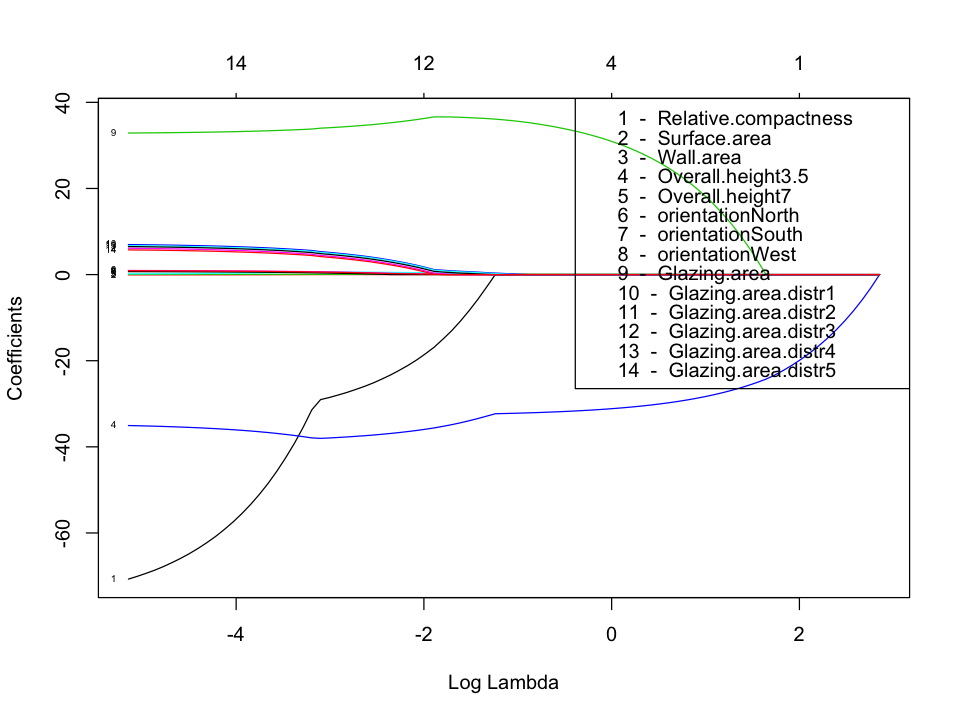

In [58]:
library(glmnet)
x.mat <- model.matrix(Energy ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Energy, x = x.mat)
options(repr.plot.width = 8, repr.plot.height = 6)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

Le graphe ci-dessus représente l'évolution des valeurs des coefficients en fonction de log(lambda).

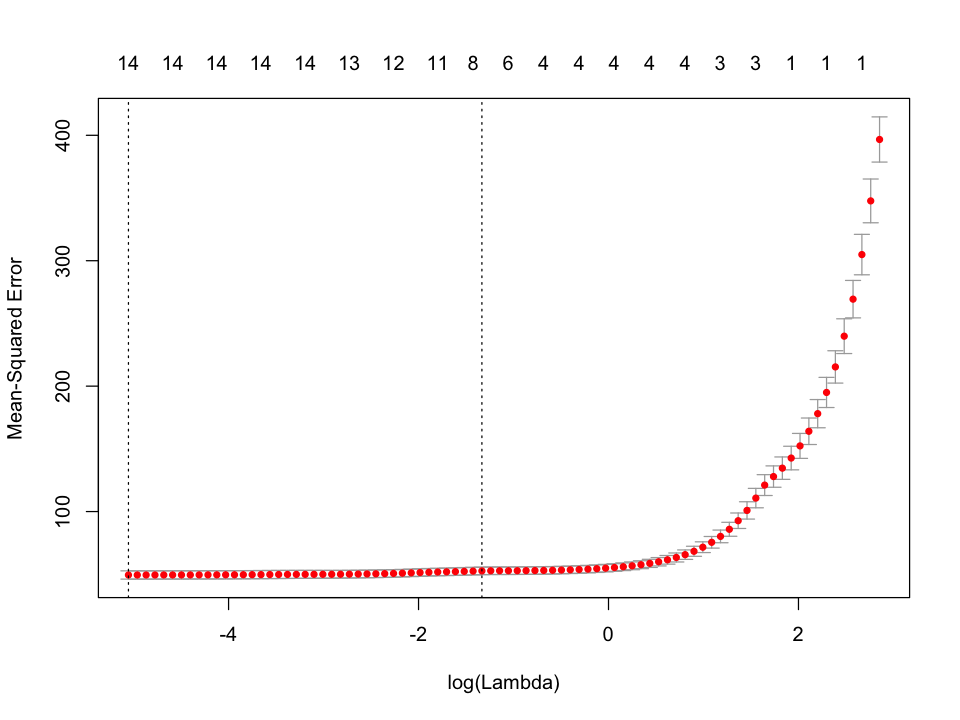

In [59]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)

In [60]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.264"

15 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)           29.81594483
Relative.compactness  -2.92329072
Surface.area           .         
Wall.area              0.08526309
Overall.height3.5    -32.87833192
Overall.height7        0.07236501
orientationNorth       .         
orientationSouth       .         
orientationWest        .         
Glazing.area          36.24247976
Glazing.area.distr1    0.45468836
Glazing.area.distr2    0.34096311
Glazing.area.distr3    .         
Glazing.area.distr4    0.05402649
Glazing.area.distr5    .         

En choisissant la valeur de lambda.min, aucun coefficient n'est supprimé du modèle. L'utilisation de l'autre estimation de lambda, lambda.1se, conduit à garder 8 coefficients non nuls. DOnc plus parcimonieux avec lambda.1se.

In [61]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappr$Energy - fit.lasso

In [62]:
t.reglm_p<-table(thresh(fit.lasso),datappq[,"Energy.efficiency"])
print(t.reglm_p)
paste("Accuracy =",round(Accuracy(t.reglm_p),3))
paste("Taux d erreur :",tauxErr(t.reglm_p))

   
      A   B   C   D   E   F   G
  A 115  25  10   0   0   0   0
  B  29  34  18   1   0   0   0
  C  17  25  29   1   0   0   0
  D   0   2   7   4   0   0   0
  E   0   1   3  55  61  32   5
  F   0   0   0   3  28  48  43
  G   0   0   0   0   0   1  17


[1] "Accuracy = 0.502"

[1] "Taux d erreur : 8.79"

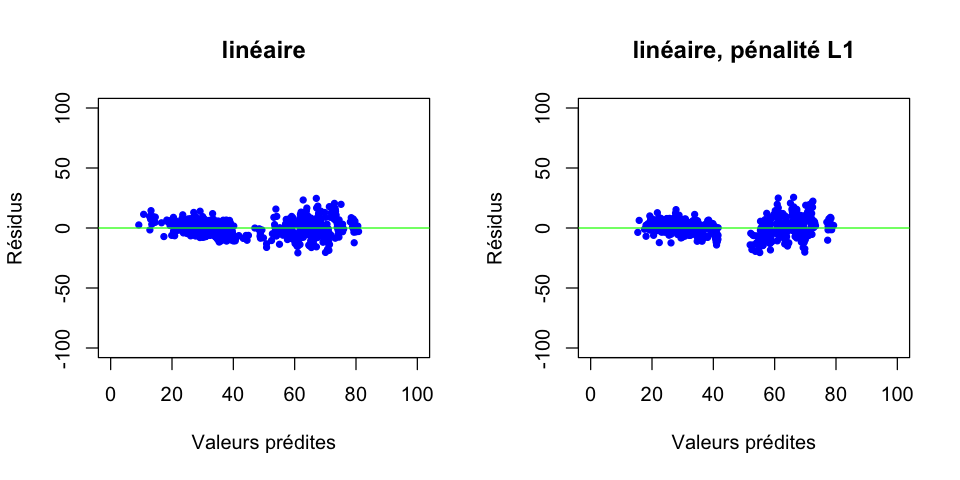

In [63]:
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")

Même si le taux d'erreur est plus faible pour le modèle linéaire avec pénalité L1, nous remarquons en analysant le graphe des résidus que le modèle ne prédit pas de valeurs d'énergie entre 42 et 51 environ. Le modèle linéaire est donc à privilégier. 

In [66]:
Tab<-data.frame(x=c(tauxErr(t.reglm),tauxErr(t.reglm_p)),y=c(Accuracy(t.reglm),Accuracy(t.reglm_p)))
rownames(Tab)<-c("Modèle linéaire","Modèle linéaire avec pénalité L1")
colnames(Tab)<-c("Taux d'erreur","Accuracy")
print(Tab)

                                 Taux d'erreur  Accuracy
Modèle linéaire                          10.26 0.5244300
Modèle linéaire avec pénalité L1          8.79 0.5016287


### Classification

In [79]:
#test
# estimation du modèle sans interaction
dis.lm <- aov(Energy.efficiency ~ . , data = datappq)

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"

In [305]:
# estimation du modèle complet
log.lm <- glmnet(Energy.efficiency ~. , data = datappq, family = multinomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

ERROR: Error in glmnet(Energy.efficiency ~ ., data = datappq, family = multinomial): argument inutilisé (data = datappq)


In [304]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=324.96
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Overall.height + orientation + Glazing.area + Glazing.area.distr



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance    AIC
- orientation           3   299.22 321.22
- Relative.compactness  1   296.99 322.99
- Wall.area             1   297.25 323.25
- Surface.area          1   298.19 324.19
<none>                      296.96 324.96
- Overall.height        1   303.48 329.48
- Glazing.area.distr    5   314.04 332.04
- Glazing.area          1   367.07 393.07


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=321.22
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Overall.height + Glazing.area + Glazing.area.distr



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                       Df Deviance    AIC
- Relative.compactness  1   299.25 319.25
- Wall.area             1   299.48 319.48
- Surface.area          1   300.38 320.38
<none>                      299.22 321.22
- Overall.height        1   305.54 325.54
- Glazing.area.distr    5   315.93 327.93
- Glazing.area          1   369.58 389.58


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=319.25
Energy.efficiency ~ Surface.area + Wall.area + Overall.height + 
    Glazing.area + Glazing.area.distr



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                     Df Deviance    AIC
- Wall.area           1   299.64 317.64
- Surface.area        1   300.38 318.38
<none>                    299.25 319.25
- Overall.height      1   307.16 325.16
- Glazing.area.distr  5   315.93 325.93
- Glazing.area        1   369.83 387.83


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=317.64
Energy.efficiency ~ Surface.area + Overall.height + Glazing.area + 
    Glazing.area.distr



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                     Df Deviance    AIC
<none>                    299.64 317.64
- Glazing.area.distr  5   316.69 324.69
- Surface.area        1   320.33 336.33
- Glazing.area        1   369.85 385.85
- Overall.height      1   483.59 499.59


### Sélection de variable par réguralisation L1 (LASSO)

In [67]:
str(datappq)

'data.frame':	614 obs. of  8 variables:
 $ Relative.compactness: num  0.983 0.984 0.979 0.978 0.903 ...
 $ Surface.area        : num  530 520 516 519 553 ...
 $ Wall.area           : num  306 300 303 293 316 ...
 $ Overall.height      : Ord.factor w/ 2 levels "3.5"<"7": 2 2 2 2 2 2 2 2 2 2 ...
 $ orientation         : Factor w/ 4 levels "East","North",..: 2 1 3 4 2 1 3 4 2 1 ...
 $ Glazing.area        : num  1.61e-02 0.00 0.00 9.55e-06 0.00 ...
 $ Glazing.area.distr  : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Energy.efficiency   : Factor w/ 7 levels "A","B","C","D",..: 2 2 3 3 4 3 3 3 4 4 ...


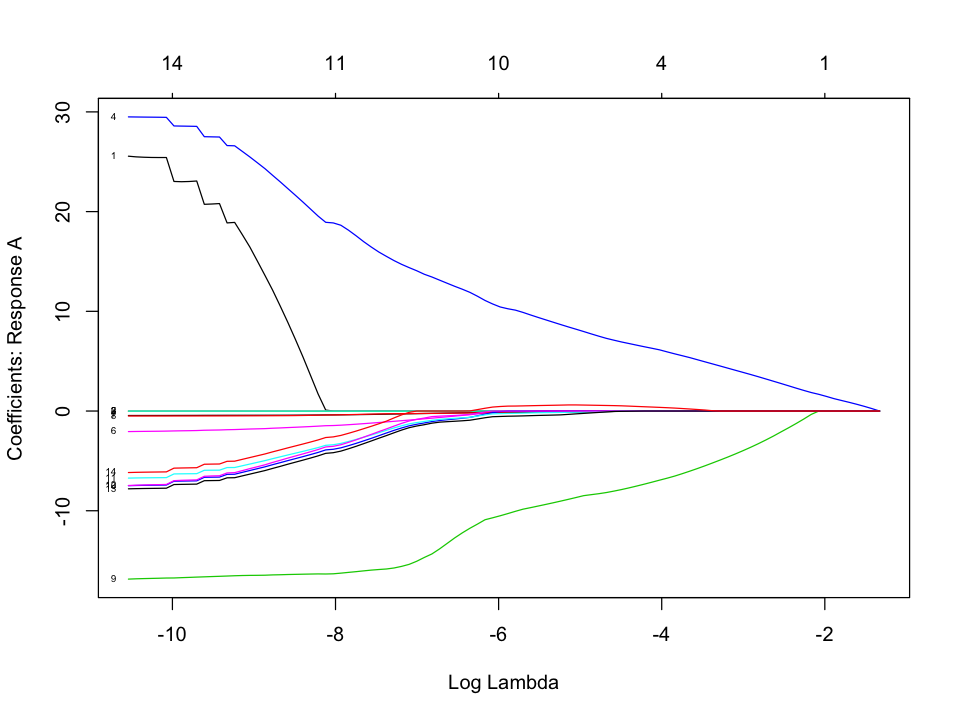

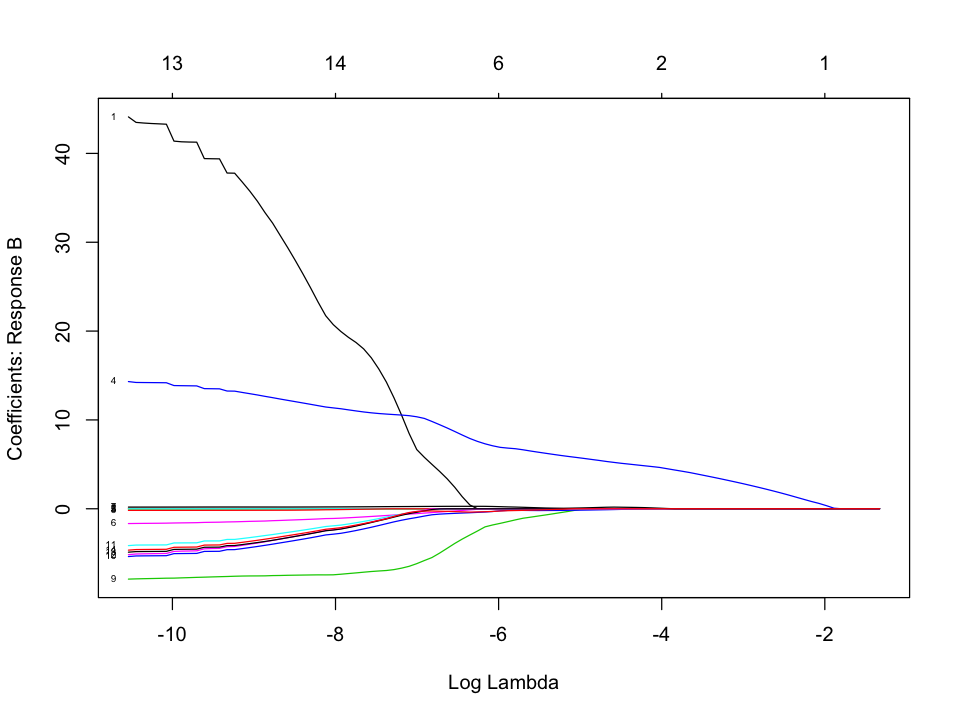

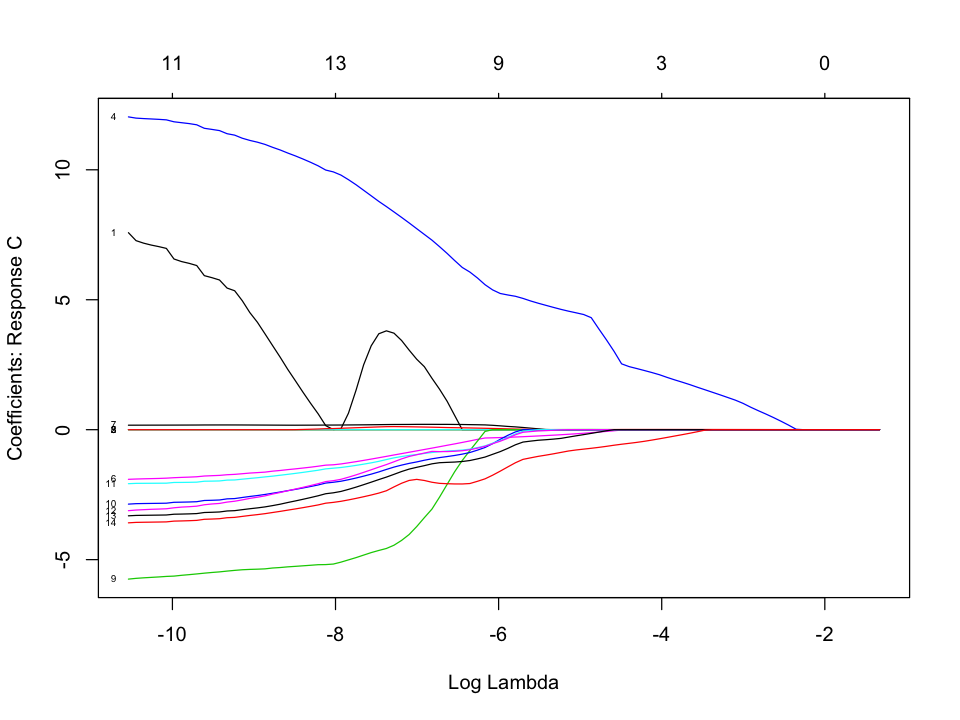

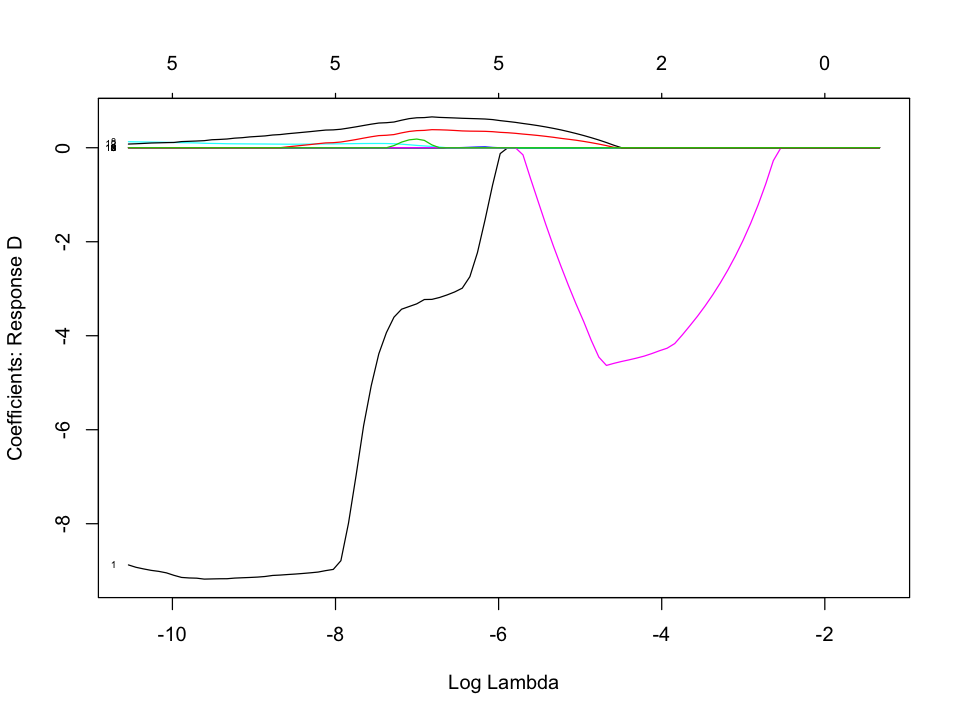

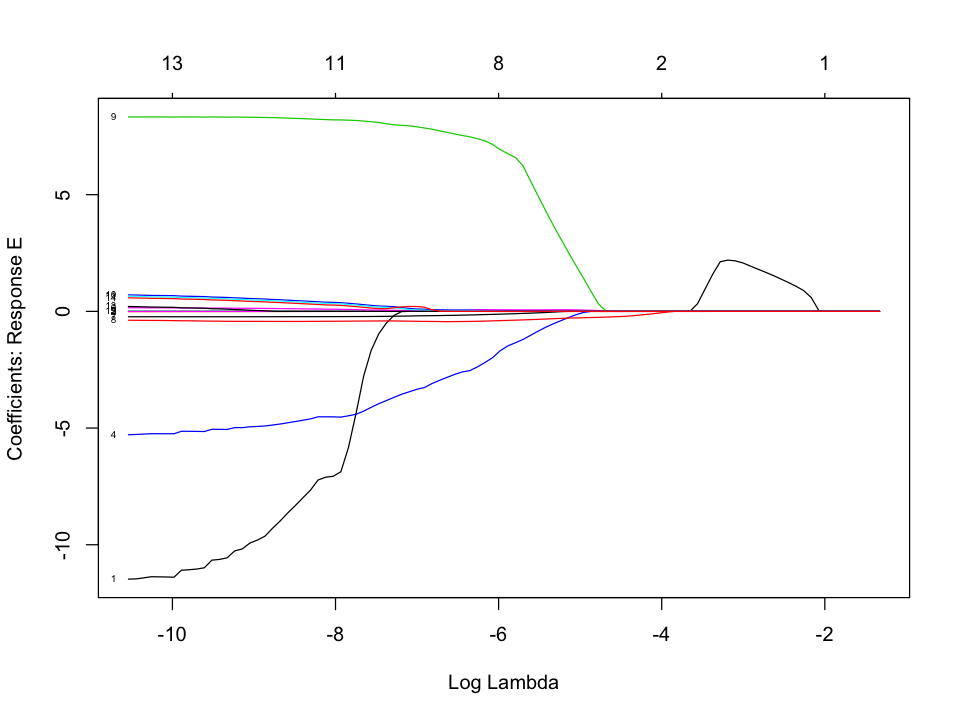

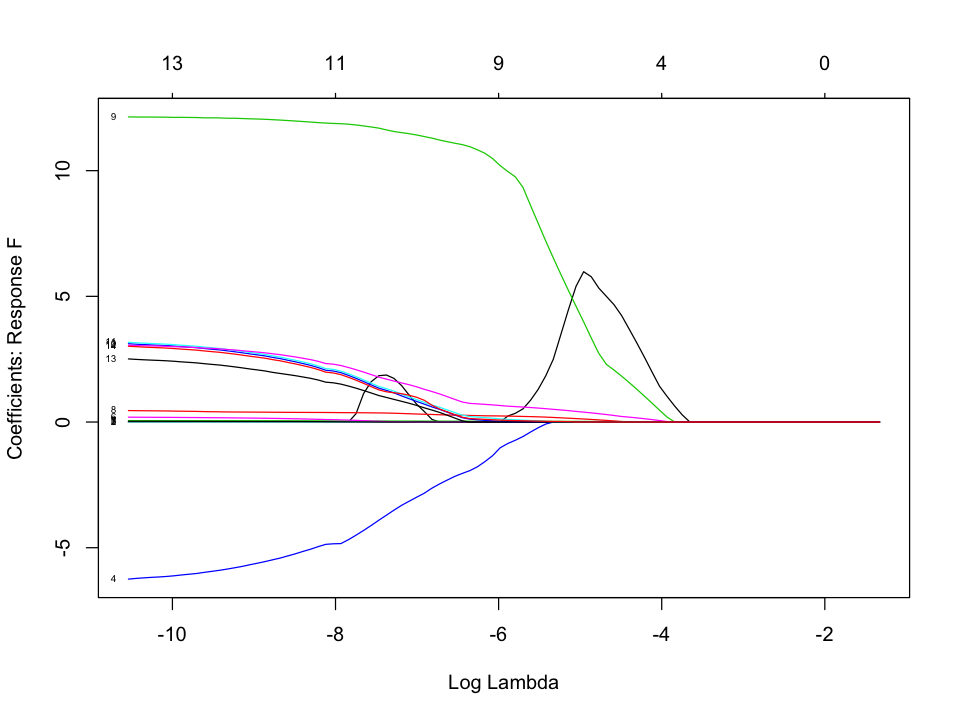

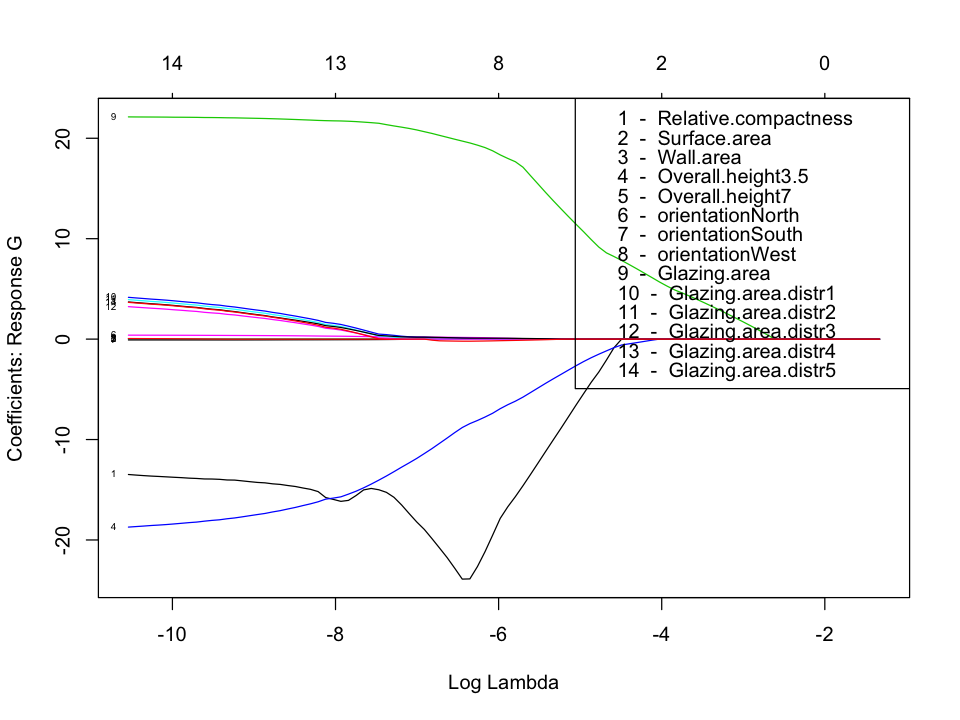

In [91]:
library(glmnet)
x.mat <- model.matrix(Energy.efficiency ~ .-1 , data = datappq)
dis.lasso <- glmnet(x = x.mat, y = datappq$Energy.efficiency, family="multinomial")
options(repr.plot.width = 8, repr.plot.height = 6)
plot(dis.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

Le graphe ci-dessus représente l'évolution des valeurs des coefficients en fonction de log(lambda). 

[1] "cv estimate 0.009"

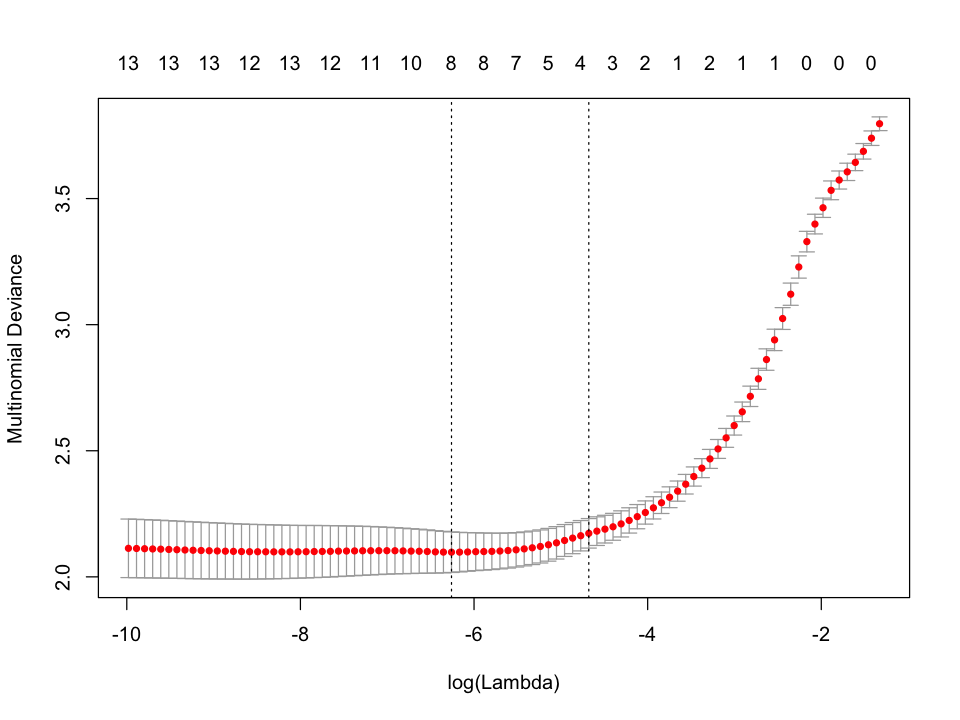

In [92]:
# choix du paramètre de régularisation par validation croisée
dis.lasso.cv<-cv.glmnet(y = datappq$Energy.efficiency, x = x.mat, family="multinomial")
plot(dis.lasso.cv)
paste("cv estimate", round(dis.lasso.cv$lambda.1se,3))


In [73]:
# modèle correspondant
coef(dis.lasso.cv, s = "lambda.min")
newx.mat<-model.matrix(Energy.efficiency~.-1, data=datestq)
dis.lasso.pred<- predict(dis.lasso.cv, s="lambda.min", type="class", newx=newx.mat)
table(dis.lasso.pred, datestq$Energy.efficiency)

$A
15 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)            3.34454235
Relative.compactness   .         
Surface.area           .         
Wall.area             -0.02443191
Overall.height3.5     10.73867610
Overall.height7        .         
orientationNorth      -0.19585163
orientationSouth      -0.13017077
orientationWest       -0.14452217
Glazing.area         -10.70688390
Glazing.area.distr1   -0.15843986
Glazing.area.distr2   -0.28398584
Glazing.area.distr3    .         
Glazing.area.distr4   -0.56982795
Glazing.area.distr5    0.39847041

$B
15 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)           1.32397271
Relative.compactness  .         
Surface.area          .         
Wall.area            -0.01553319
Overall.height3.5     7.08901628
Overall.height7       .         
orientationNorth      .         
orientationSouth      0.25753722
orientationWest       .         
Glazing.area         -1.82328480
Gl

              
dis.lasso.pred  A  B  C  D  E  F  G
             A 42  9  4  0  0  0  0
             B  5  7  5  0  0  0  0
             C  0  5  3  0  0  0  0
             D  0  1  1  6  5  2  0
             E  0  0  0  6  9  6  2
             F  0  0  0  2  3  8  4
             G  0  0  0  1  3  5 10

En ligne c'est la prévision et en colonne la réalité.

*En choisissant la valeur de lambda.min, aucun coefficient n'est supprimé du modèle. L'utilisation de l'autre estimation de lambda, lambda.1se, conduit à garder 8 coefficients non nuls. DOnc plus parcimonieux avec lambda.1se.*

In [ ]:
t.regl_p.dis<-table(dis.lasso.pred,datestq[,"Energy.efficiency"])
print(t.regl_p.dis)
classRate.regl_p.dis <- sum(diag(t.regl_p.dis))/sum(t.regl_p.dis)
paste("Accuracy = ",round(classRate.regl_p.dis,3))

### Comparaison modèle linéaire / linéaire avec pénalité L1 (avec lambda.1se)

In [78]:
# Extraction des valeurs ajustées et des résidus
#fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappq$Energy.efficiency - dis.lasso.pred
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(dis.lasso.pred, res.lasso, "linéaire, pénalité L1")

Warning message in Ops.factor(datappq$Energy.efficiency, dis.lasso.pred):
"'-' not meaningful for factors"

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [94]:
fit.lasso[round(fit.lasso)==43]

numeric(0)

*Nous remarquons que le modèle linéaire avec la pénalité L1 ne prédit pas de valeurs d'énergie entre 43 et 51 (ce qui correspond à la classe D), contrairement au modèle linéaire?*

Pas bcp de différence avec la pénalité et pourtant un modèle + parcimonieux

## <FONT COLOR="Red">Arbre de décision binaire</font>

### Discrimination

In [67]:
set.seed(109)
library(rpart)
tree.dis=rpart(Energy.efficiency~.,data=datappq,control=rpart.control(cp=0.001))

Le cp utilisé est une valeur par défaut, mais nous cherchons à obtenir la valeur qui permettra d'avoir la plus petite erreur possible pour la construction de l'arbre. Les arbres binaires étant très instables et dépendants des données d'apprentissage, le cp permet d'élaguer l'arbre pour le rendre plus parcimonieux.

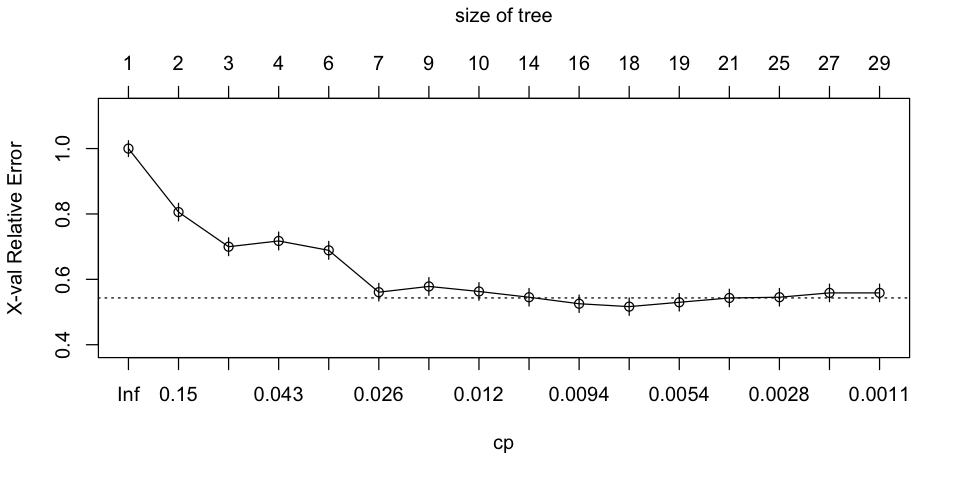

In [68]:
#printcp(tree.dis)
plotcp(tree.dis)

Ce graphique qui représente, 

In [69]:
#attributes(printcp(tree.dis))
c<-0.0066225

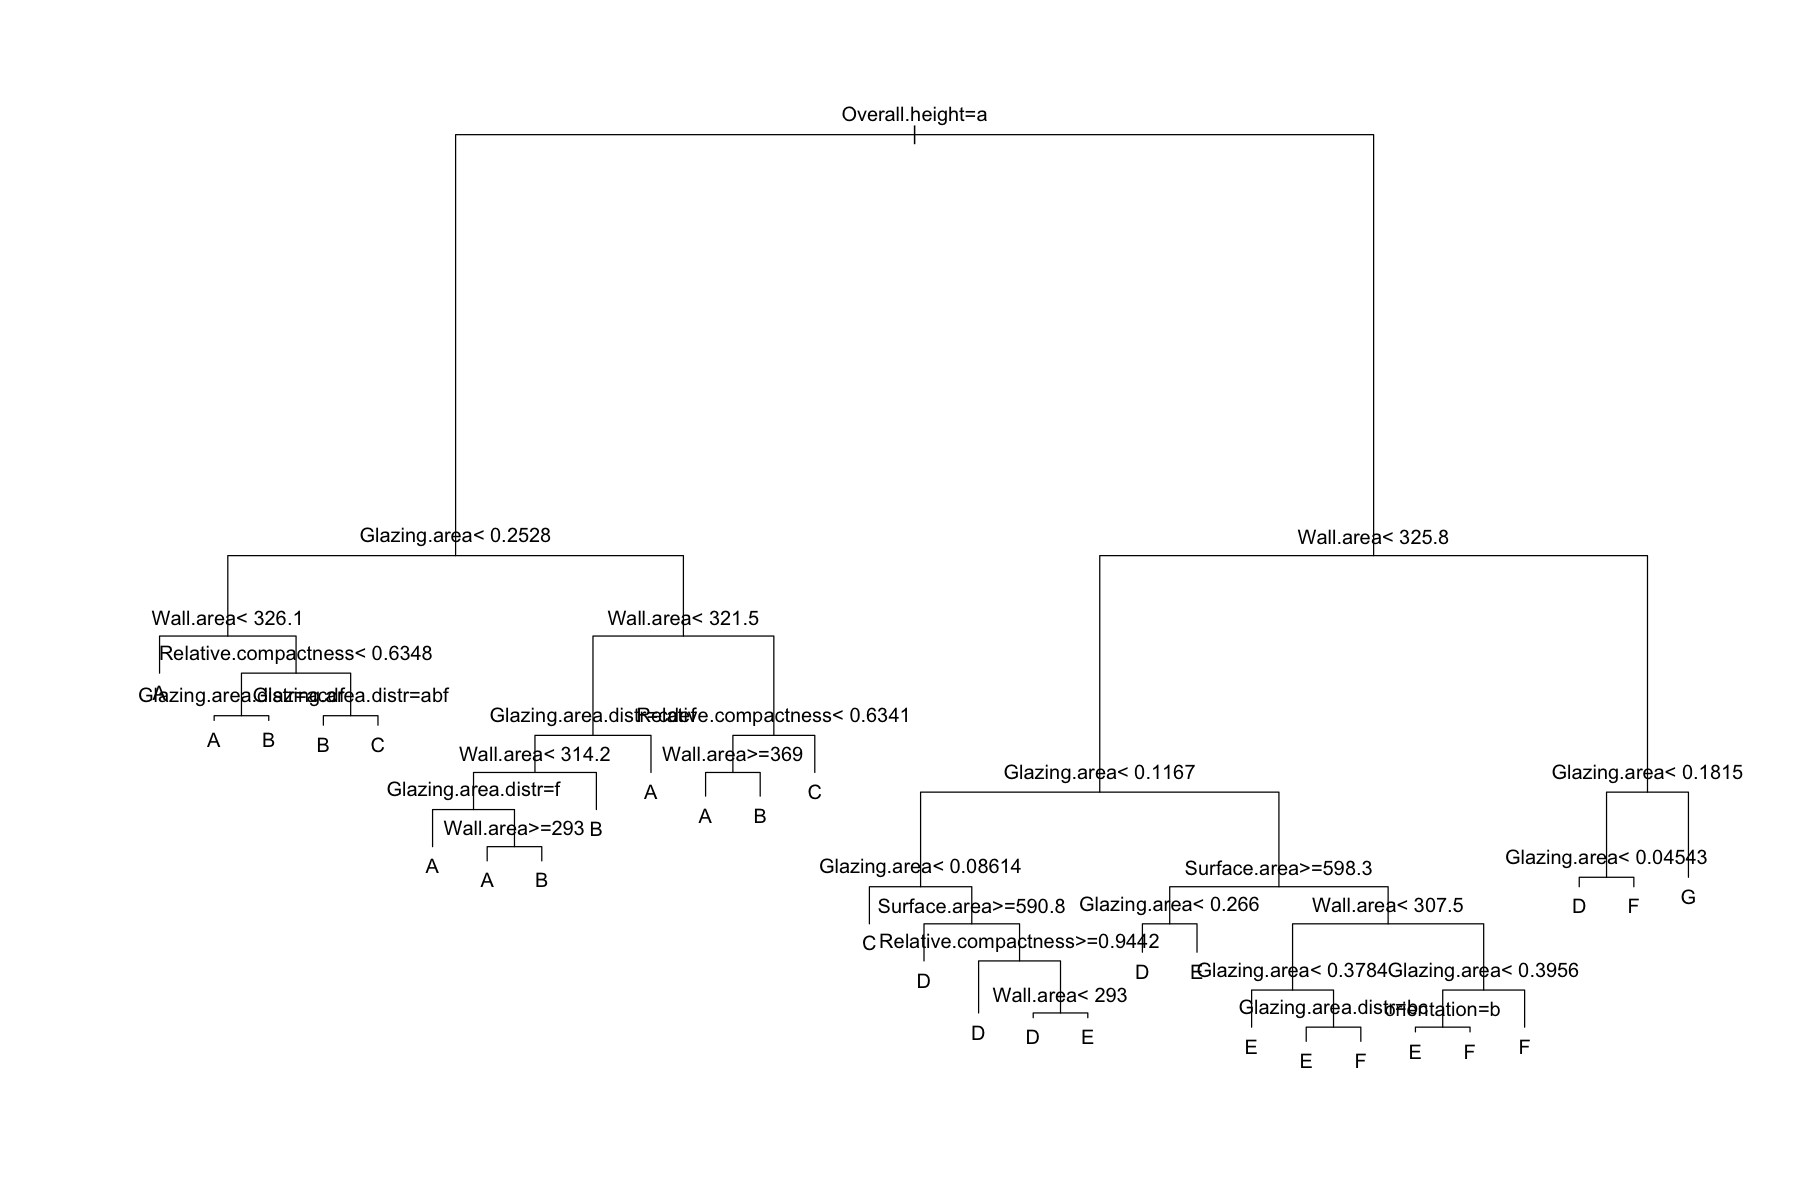

In [70]:
options(repr.plot.width=15, repr.plot.height=10,cp=c)
plot(tree.dis)
text(tree.dis)

In [72]:
pred.treed=predict(tree.dis,newdata=datestq,type="class")
t.add<-table(pred.treed,datestq[,"Energy.efficiency"])
print(t.add)
paste("Accuracy = ",round(Accuracy(t.add),3))

          
pred.treed  A  B  C  D  E  F  G
         A 41  3  1  0  0  0  0
         B  6 15  8  0  0  0  0
         C  0  4  3  1  0  0  0
         D  0  0  1 10  3  0  0
         E  0  0  0  4 11  5  0
         F  0  0  0  0  6 12  5
         G  0  0  0  0  0  4 11


[1] "Accuracy =  0.669"

### Régression

In [73]:
set.seed(105)
tree.reg=rpart(Energy~.,data=datappr,control=rpart.control(cp=0.001))

In [74]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"Energy"])^2
CVerr=apply(xerr,2,sum)
CVerr  

0.880942372 0.255110036 0.050176321 0.019528467 0.012681185 0.009290783 
  243393.78    58027.06    38708.39    31609.10    30727.26    26810.02 
0.006888630 0.005774957 0.004290596 0.003676369 0.003184844 0.002733097 
   26584.62    25253.92    24321.95    24216.23    23072.84    22306.69 
0.002552932 0.002454943 0.002396924 0.002311870 0.001972149 0.001576805 
   21466.70    21619.92    21528.34    21463.61    20423.05    19901.75 
0.001282174 0.001064311 
   19611.50    19343.04

In [75]:
c<-as.numeric(attributes(which.min(CVerr))$names)
print(c)

[1] 0.001064311


In [76]:
set.seed(100)
tree.reg=rpart(Energy~.,data=datappr,control=rpart.control(cp=c))

In [77]:
#install.packages("partykit")

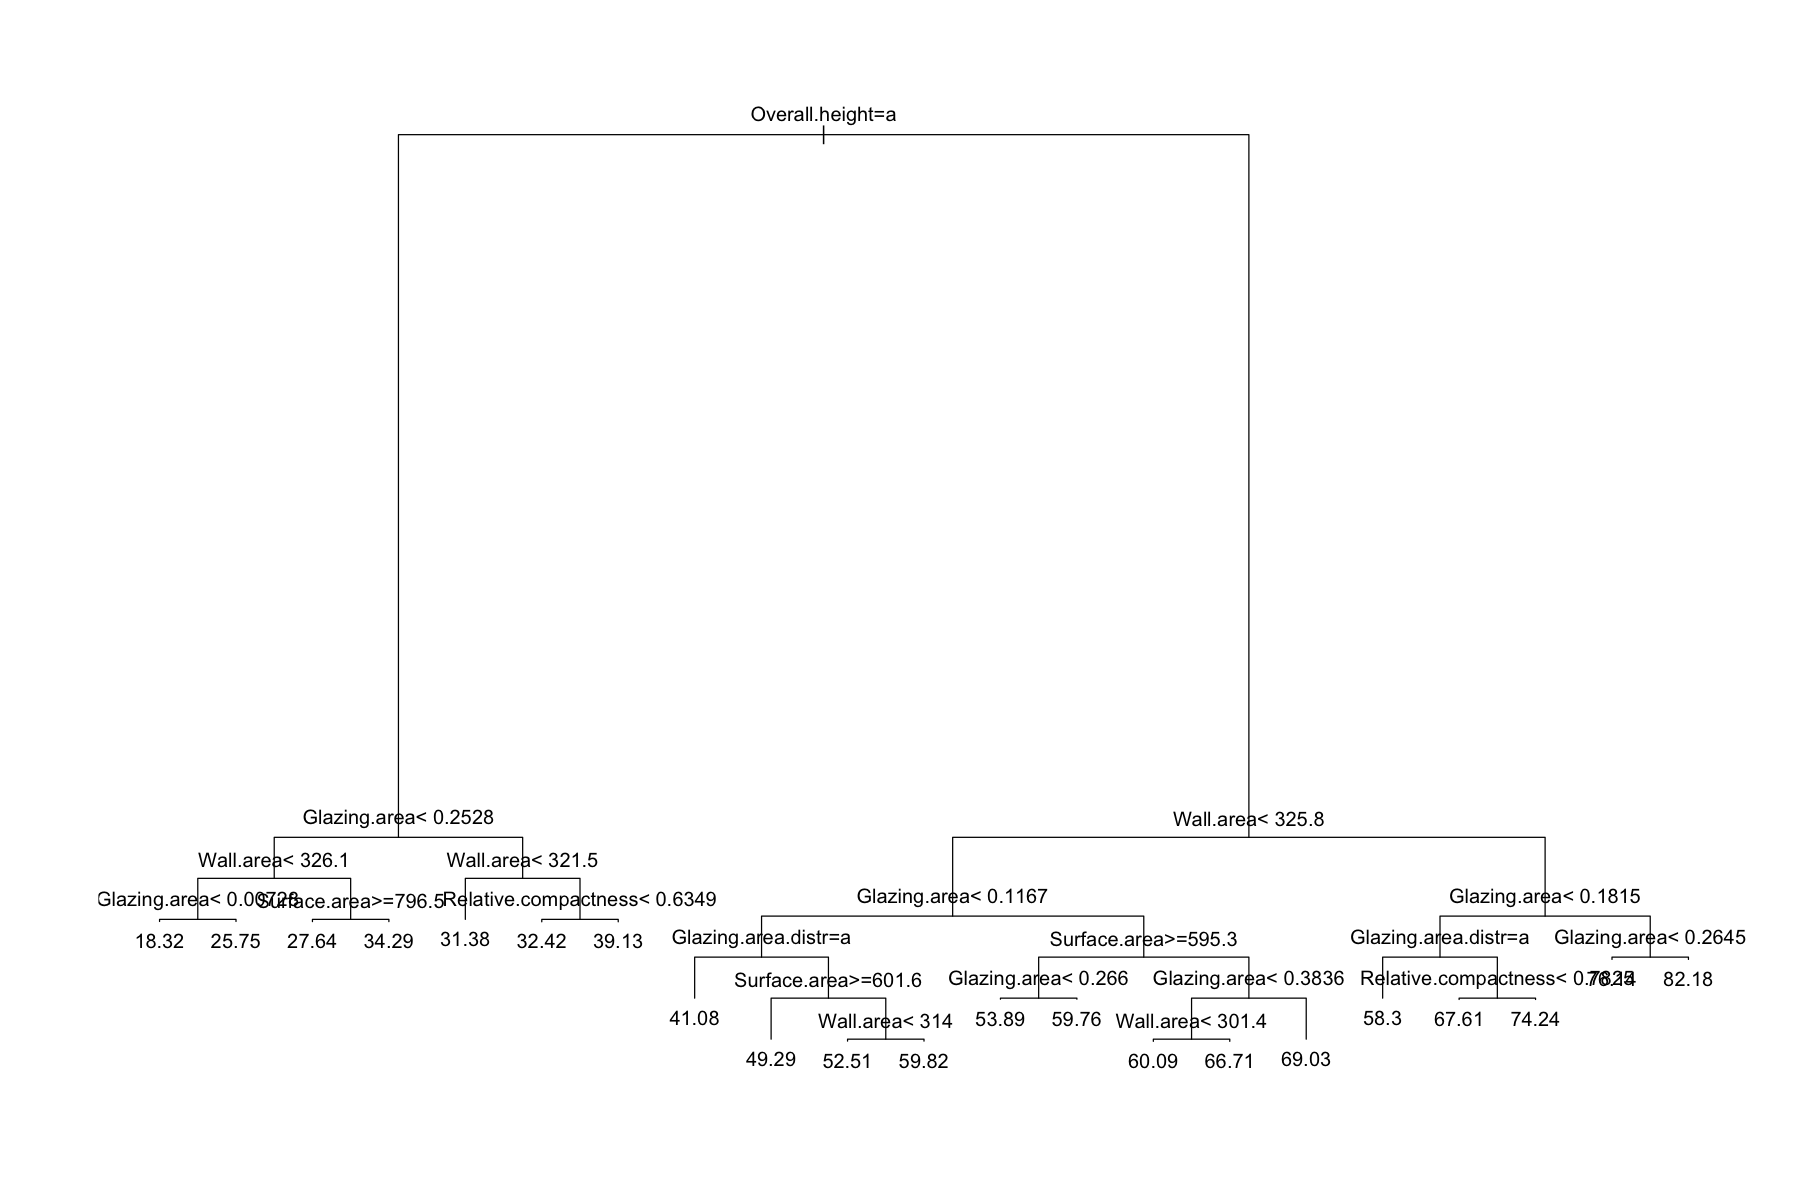

In [78]:
options(repr.plot.width=15, repr.plot.height=10)
plot(tree.reg)
text(tree.reg)

Nous remarquons que c'est la variable *Overall.height* qui a permis de découper le jeu de données à la racine. Ceci laisse supposer que cette variable est importante.  

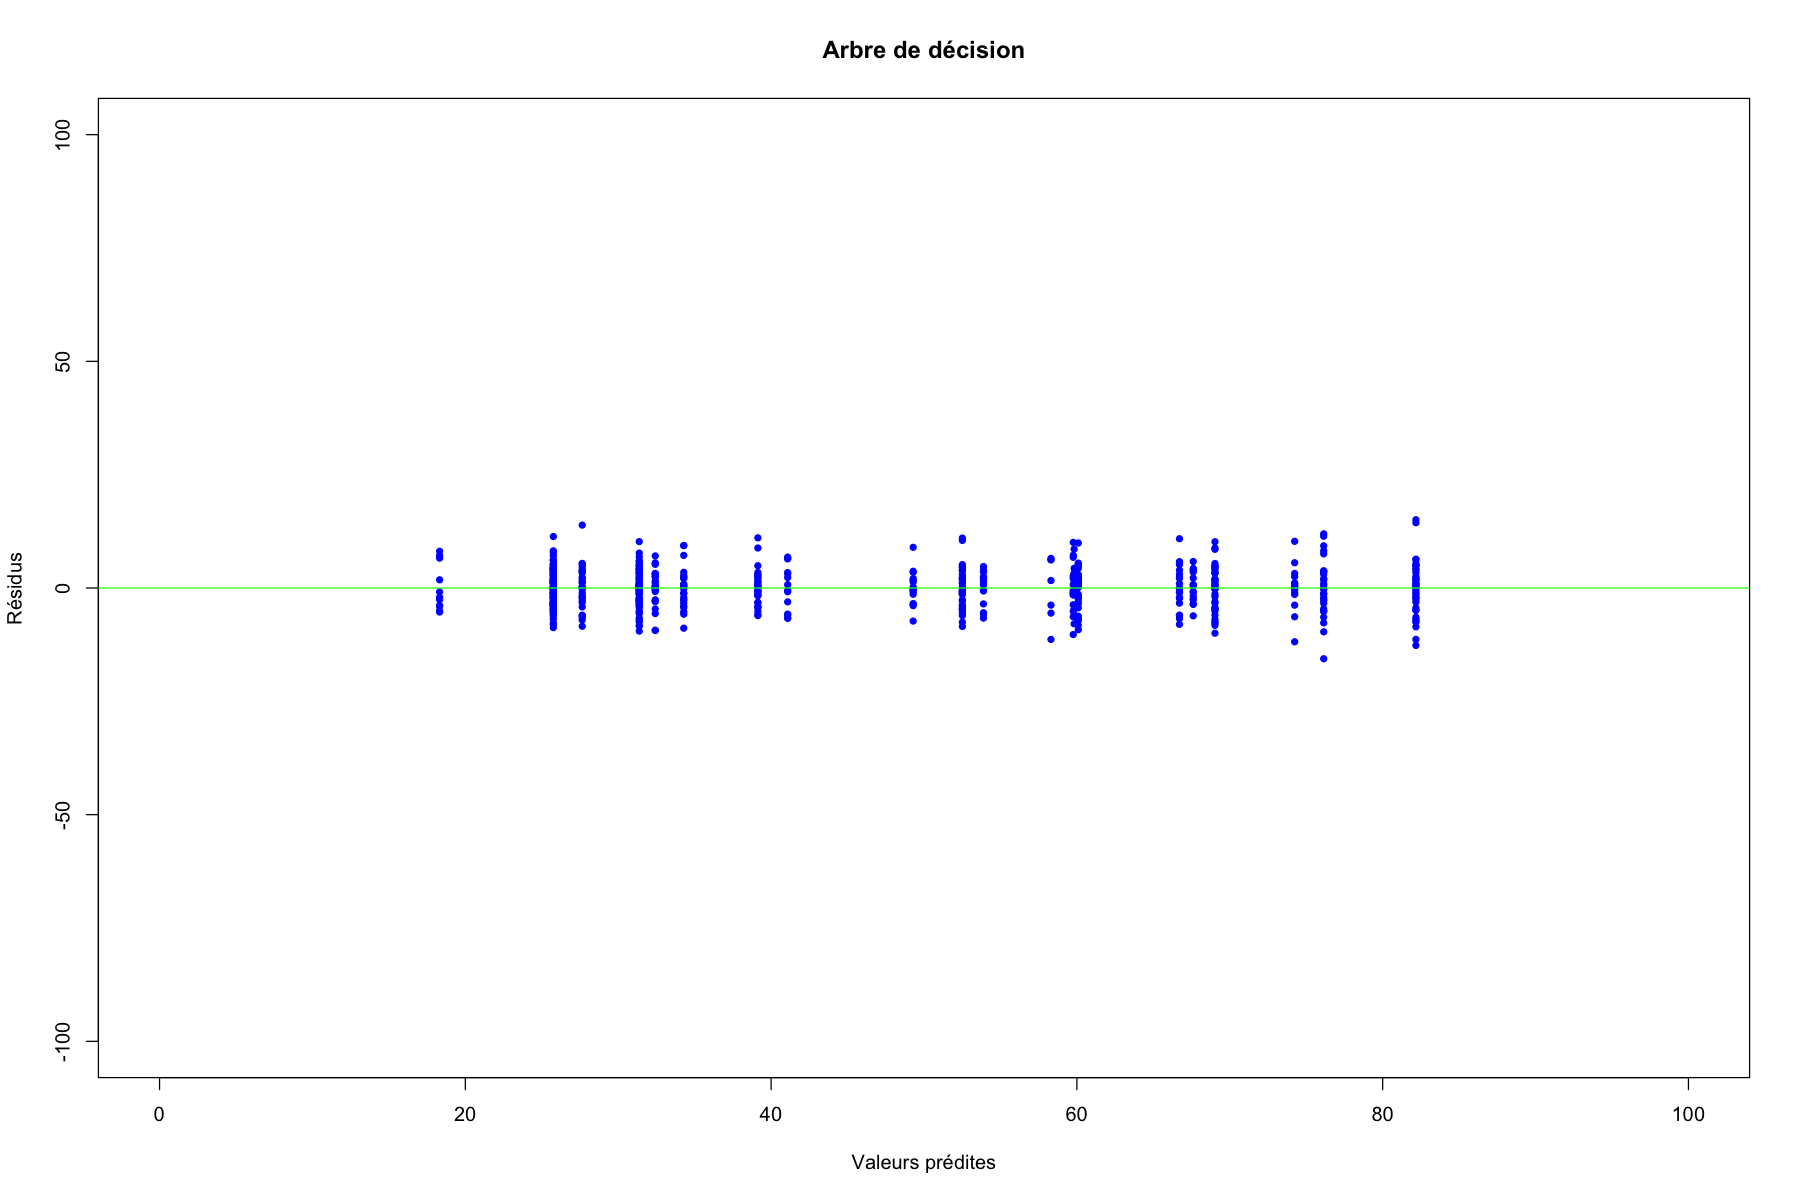

In [79]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Energy"]
plot.res(fit.tree,res.tree,"Arbre de décision")

La structure particulière du graphe est due au fait que plusieurs observations se retrouvent dans une même feuille, et prendront donc la même valeur. En effet, en régression, la prédiction contenue dans les feuilles est égale à la moyenne des observations contenue dans la feuille. Toutes les observations d'une même feuille auront la même prévision.

In [80]:
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"Energy"])^2)/nrow(datestr)

[1] 22.8236

In [81]:
t.adr<-table(thresh(pred.treer),datestq[,"Energy.efficiency"])
print(t.adr)
paste("Accuracy = ",round(Accuracy(t.adr),3))

   
     A  B  C  D  E  F  G
  A 33  3  1  0  0  0  0
  B 14 17  8  0  0  0  0
  C  0  2  3  1  0  0  0
  D  0  0  1 11  4  0  0
  E  0  0  0  3  9  1  0
  F  0  0  0  0  7 16  5
  G  0  0  0  0  0  4 11


[1] "Accuracy =  0.649"

**Conclusion arbre de décision :** Les arbres de décision sont faciles à interpréter mais sont enclin au sur-apprentissage. C'est pour cette raison que nous testons ensuite les forêts aléatoires, agrégation de plusieurs arbres, qui malgré la perte d'interprétabilité sont beaucoup plus robustes.  

## <FONT COLOR="Red"> Random Forest</font>

### Discrimination

In [101]:
install.packages("caret")

Le package "caret" nous permet de calibrer les hyperparamètres des random forest, en effectuant ici une validation croisée avec 10 paquets.

In [82]:
library(caret)
library(e1071)
set.seed(108)
cvControl <- trainControl(method ="cv", number =10)
ntryTrials <- train(Energy.efficiency ~ . , data=datappq, method="rf",tuneLength=ncol(datappq),trControl = cvControl, ntree=500,trace = FALSE,importance=T)
ntryTrials

Loading required package: lattice


Random Forest 

614 samples
  7 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 550, 553, 553, 552, 555, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.5765546  0.4851357
   3    0.6105064  0.5321909
   5    0.6218573  0.5470600
   6    0.6232353  0.5485648
   8    0.6332055  0.5608476
   9    0.6365133  0.5650741
  11    0.6268838  0.5539506
  13    0.6285239  0.5559165

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.

Nous avons ici régler le paramètre mtry à l'aide du package caret. Nous gardons donc la valeur de mtry=9.

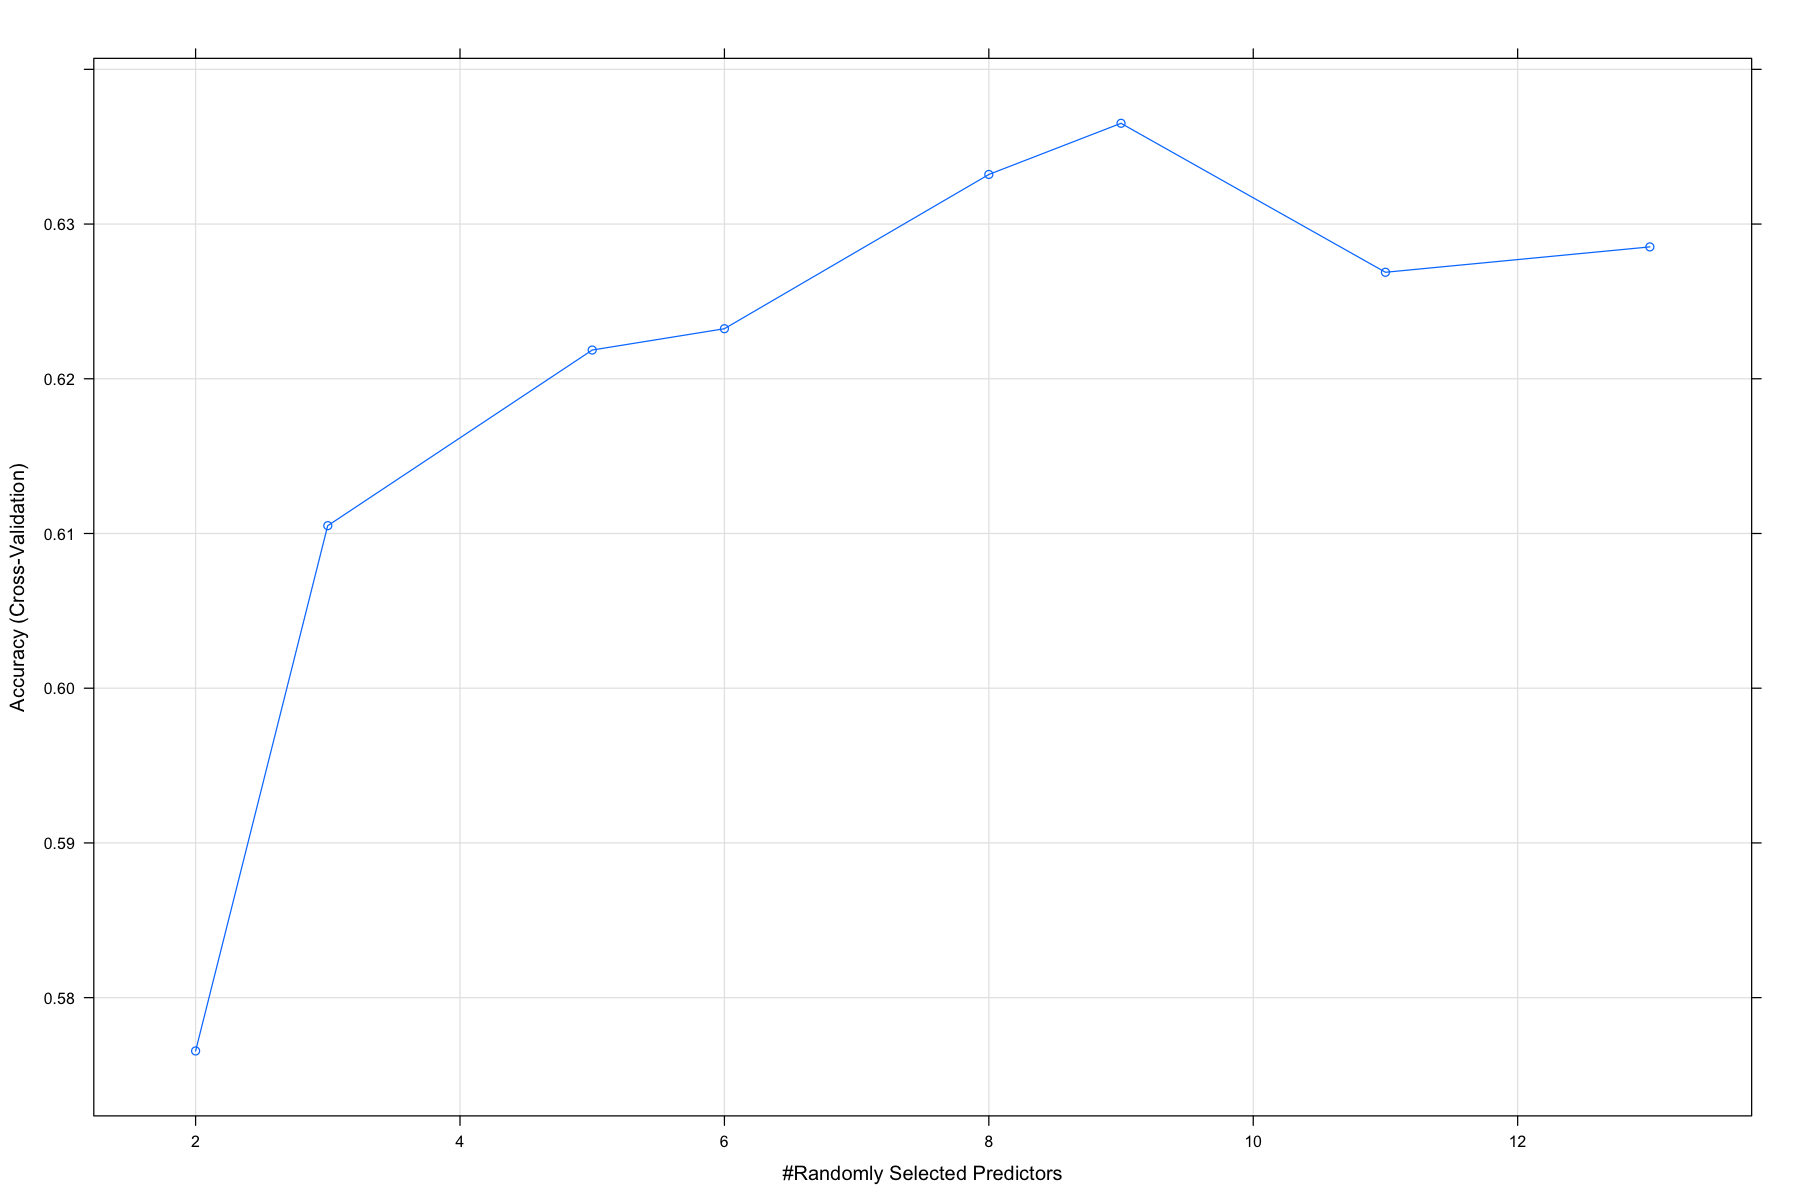

In [83]:
plot(ntryTrials)

In [84]:
pred.dis <- predict(ntryTrials,newdata=datestq)
tabl.dis<-table(pred.dis, datestq[,"Energy.efficiency"])
print(tabl.dis)
paste("Accuracy = ",round(Accuracy(tabl.dis),3))

        
pred.dis  A  B  C  D  E  F  G
       A 37  3  2  0  0  0  0
       B 10 10  4  0  0  0  0
       C  0  9  6  0  0  0  0
       D  0  0  1 12  2  0  0
       E  0  0  0  3 13  4  0
       F  0  0  0  0  5 13  5
       G  0  0  0  0  0  4 11


[1] "Accuracy =  0.662"

Le taux de classification est maintenant de 66%, un peu supérieur au précédent.

In [85]:
varImp(ntryTrials)

rf variable importance

  variables are sorted by maximum importance across the classes
                          A      B      C     D      E      F       G
Glazing.area         98.573 58.222 74.716 96.82 60.272 79.719 100.000
Wall.area            75.313 15.999 63.220 77.26 59.201 50.749  64.337
Overall.height.L     74.269 65.749 67.662 68.08 70.484 67.935  73.280
Surface.area         71.636 28.114 54.950 44.08 72.033 67.092  53.859
Relative.compactness 45.663 22.806 40.747 61.24 49.835 46.441  48.174
orientationNorth      4.769  6.950 26.208 17.60  5.209  8.746   7.693
Glazing.area.distr4  14.440 25.412  4.429 10.96  6.259  4.198  12.327
Glazing.area.distr1   5.883 22.497 23.769 19.40  6.106 12.820  16.707
Glazing.area.distr5  18.139 22.868 11.406 14.18  6.777  4.376   3.416
orientationSouth      5.901  5.862  7.782 22.21 22.094  9.728  13.704
Glazing.area.distr2   3.919  0.000 11.949 21.39  7.985  7.444  16.326
orientationWest      19.700 16.271 10.974  1.09 18.234 19.195   4.804
Gl

<FONT COLOR="Red">*Je sais pas trop comment on interprète ça, c'est l'importance par rapport à chaque seuil?*</font>

### Régression

In [86]:
set.seed(110)
cvControl <- trainControl(method ="cv", number =10)
ntryTrials <- train(Energy ~ . , data=datappr, method="rf",tuneLength=ncol(datappr),ntree=500,trControl = cvControl, trace = FALSE,importance=T)
ntryTrials

Random Forest 

614 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 551, 554, 554, 553, 552, 552, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    6.039026  0.9163792  4.776688
   3    5.268803  0.9319344  4.156016
   5    4.959820  0.9386275  3.920890
   6    4.927848  0.9392819  3.885267
   8    4.882567  0.9403622  3.851642
   9    4.912327  0.9396854  3.881623
  11    4.926817  0.9392792  3.892904
  13    4.995925  0.9377410  3.930620

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.

Ici nous choisissons mtry=8.

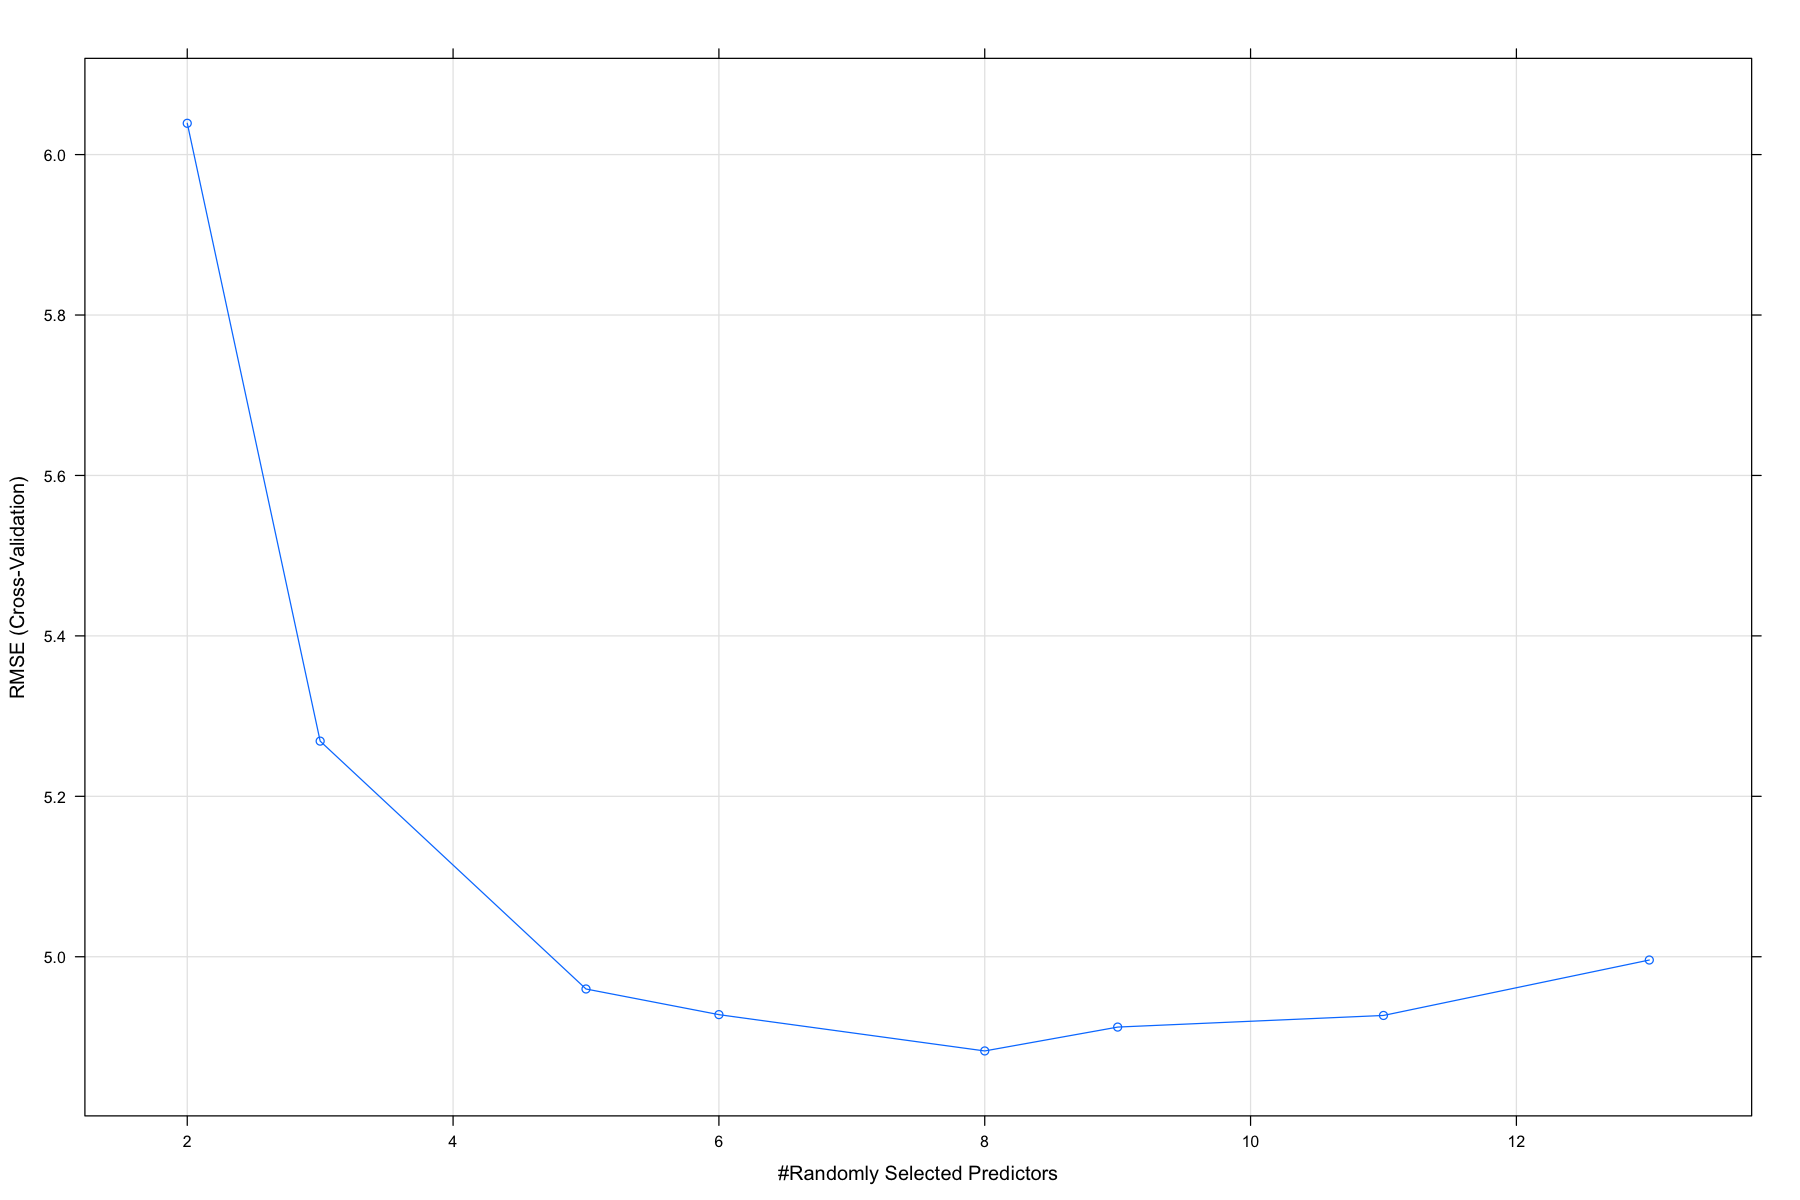

In [87]:
plot(ntryTrials)

L'algorithme a choisi mtry=8. Cette valeur minimise l'erreur de la validation croisée, comme nous pouvons le voir dans le graphe au-dessus qui représente l'évolution de l'erreur quadratique moyenne en fonction du nombre de variables tirées aléatoirement à chaque noeud. Autrement dit, à chaque noeud, l'algorithme tire aléatoirement 8 variables et cherche parmi les 8 celle qui permet d'obtenir la meilleure subdivision possible.  

In [88]:
pred.reg<-predict(ntryTrials,newdata=datestr)
tabl.reg<-table(thresh(pred.reg), datestq[,"Energy.efficiency"])
print(tabl.reg)
paste("Accuracy = ",round(Accuracy(tabl.reg),3))

   
     A  B  C  D  E  F  G
  A 37  2  1  0  0  0  0
  B 10 15  6  0  0  0  0
  C  0  5  5  0  0  0  0
  D  0  0  1 11  1  0  0
  E  0  0  0  4 13  3  0
  F  0  0  0  0  6 14  5
  G  0  0  0  0  0  4 11


[1] "Accuracy =  0.688"

In [ ]:
res.rf=pred.reg-datappr[,"Energy"]
plot.res(pred.reg,res.rf,"Random Forest")

<FONT COLOR="Red">Commentaire</font>

In [89]:
varImp(ntryTrials)

rf variable importance

                     Overall
Glazing.area         100.000
Wall.area             31.417
Overall.height.L      29.223
Surface.area          20.481
Relative.compactness  17.414
Glazing.area.distr2    4.980
Glazing.area.distr5    4.210
Glazing.area.distr1    3.405
Glazing.area.distr3    3.013
orientationNorth       2.759
orientationWest        1.664
Glazing.area.distr4    1.086
orientationSouth       0.000

Les variables ayant le plus d'importance sont donc *Glazing.area*, *Wall.area* et *Overall.heightL*. La variable *Orientation* n'apporte très peu d'information. 

**Comparaison tableau discrimination et régression :** 

In [91]:
paste("Table de contingence Discrimination (avec calibration des paramètres). Accuracy = ",round(Accuracy(tabl.dis),3))
print(tabl.dis)
paste("Table de contingence Régression puis thresholding (avec calibration des paramètres). Accuracy = ",round(Accuracy(tabl.reg),3))
print(tabl.reg)

[1] "Table de contingence Discrimination (avec calibration des paramètres). Accuracy =  0.662"

        
pred.dis  A  B  C  D  E  F  G
       A 37  3  2  0  0  0  0
       B 10 10  4  0  0  0  0
       C  0  9  6  0  0  0  0
       D  0  0  1 12  2  0  0
       E  0  0  0  3 13  4  0
       F  0  0  0  0  5 13  5
       G  0  0  0  0  0  4 11


[1] "Table de contingence Régression puis thresholding (avec calibration des paramètres). Accuracy =  0.688"

   
     A  B  C  D  E  F  G
  A 37  2  1  0  0  0  0
  B 10 15  6  0  0  0  0
  C  0  5  5  0  0  0  0
  D  0  0  1 11  1  0  0
  E  0  0  0  4 13  3  0
  F  0  0  0  0  6 14  5
  G  0  0  0  0  0  4 11


**Conclusion Random Forest :** Nous pouvons déduire dans le cas de Random Forest, que considérer le problème de régression d'abord puis seuiller améliore la prévision par rapport au cas de discrimination. La prévision est meilleure dans ce cas notamment pour la classe B et la classe F.  

Les modèles obtenus avec Random Forest sont robustes, mais difficilement interprétables. Pour pallier ce problème, l'analyse de l'importance des variables nous permet de discerner les variables qui apportent le plus d'information pour la construction des modèles. Dans les deux cas considérés, ce sont *Glazing.area*, *Wall.area* et *Overall.heightL* qui contribuent le plus à la construction des modèles. 

## <FONT COLOR="Red">Boosting</font>

### Discrimination

In [ ]:
install.packages("gbm")

In [92]:
set.seed(110)
tc = trainControl(method = "cv", number=10)
gbm.dis = train(Energy.efficiency ~., data=datappq, method="gbm", trControl=tc,tuneGrid = expand.grid(shrinkage= c(0.03, 0.1),n.trees=c(100,200,300),interaction.depth=c(6,10),n.minobsinnode=10))

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.9459             nan     0.0300    0.1406
     2        1.8472             nan     0.0300    0.1310
     3        1.7597             nan     0.0300    0.1128
     4        1.6854             nan     0.0300    0.0886
     5        1.6220             nan     0.0300    0.0893
     6        1.5612             nan     0.0300    0.0743
     7        1.5078             nan     0.0300    0.0693
     8        1.4582             nan     0.0300    0.0561
     9        1.4158             nan     0.0300    0.0631
    10        1.3704             nan     0.0300    0.0521
    20        1.0675             nan     0.0300    0.0205
    40        0.7746             nan     0.0300    0.0027
    60        0.6312             nan     0.0300   -0.0011
    80        0.5364             nan     0.0300   -0.0035
   100        0.4697             nan     0.0300   -0.0059
   120        0.4148             nan     0.0300   -0.0041
   140        

In [93]:
pred.gbm.dis = predict(gbm.dis, datestq)

In [94]:
table.gbm.dis<-table(pred.gbm.dis, datestq[,"Energy.efficiency"])
print(table.gbm.dis)
paste("Accuracy = ",round(Accuracy(table.gbm.dis),3))

            
pred.gbm.dis  A  B  C  D  E  F  G
           A 39  5  1  0  0  0  0
           B  8  7  7  0  0  0  0
           C  0  9  4  0  1  0  0
           D  0  1  1 13  5  0  0
           E  0  0  0  2  9  7  1
           F  0  0  0  0  5 10  5
           G  0  0  0  0  0  4 10


[1] "Accuracy =  0.597"

### Régression

In [99]:
set.seed(110)
tc = trainControl(method = "cv", number=10)
gbm.reg = train(Energy ~., data=datappr, method="gbm", trControl=tc,tuneGrid = expand.grid(shrinkage= c(0.03, 0.1),n.trees=c(200,300,400),interaction.depth=c(6,10),n.minobsinnode=10))

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1      378.5974             nan     0.0300   22.2127
     2      358.4985             nan     0.0300   20.2891
     3      339.4208             nan     0.0300   19.0622
     4      321.9031             nan     0.0300   15.6257
     5      305.4217             nan     0.0300   17.4906
     6      289.4553             nan     0.0300   16.1385
     7      274.9957             nan     0.0300   13.8772
     8      260.9620             nan     0.0300   14.2867
     9      247.7743             nan     0.0300   13.0043
    10      235.1421             nan     0.0300   12.4270
    20      143.6239             nan     0.0300    6.5289
    40       62.6448             nan     0.0300    2.0153
    60       35.0293             nan     0.0300    0.6542
    80       25.0277             nan     0.0300    0.2384
   100       20.3609             nan     0.0300    0.0216
   120       17.8416             nan     0.0300    0.0353
   140       1

In [100]:
pred.gbm.reg = predict(gbm.reg, datestr)
table.gbm.reg<-table(thresh(pred.gbm.reg), datestq[,"Energy.efficiency"])
print(table.gbm.reg)
paste("Accuracy = ",round(Accuracy(table.gbm.reg),3))

   
     A  B  C  D  E  F  G
  A 34  2  1  0  0  0  0
  B 13 17  7  0  0  0  0
  C  0  3  4  1  0  0  0
  D  0  0  1 10  2  0  0
  E  0  0  0  4 13  1  0
  F  0  0  0  0  5 18  5
  G  0  0  0  0  0  2 11


[1] "Accuracy =  0.695"

In [ ]:
res.boost=pred.gbm.reg-datappr[,"Energy"]
plot.res(pred.gbm.reg,res.boost,"Arbre de décision")

<FONT COLOR="Red">Commentaire</font>

In [106]:
set.seed(104)
library(gbm)
boost.reg=gbm(Energy~., data=datappr,distribution="gaussian",n.trees=300,
        n.minobsinnode = 10,shrinkage=0.03,interaction.depth=6,verbose=FALSE)

,var,rel.inf
Overall.height,Overall.height,61.5882244
Relative.compactness,Relative.compactness,10.9996683
Glazing.area,Glazing.area,9.1086042
Wall.area,Wall.area,9.0018701
Surface.area,Surface.area,7.9905068
Glazing.area.distr,Glazing.area.distr,0.9825017
orientation,orientation,0.3286245


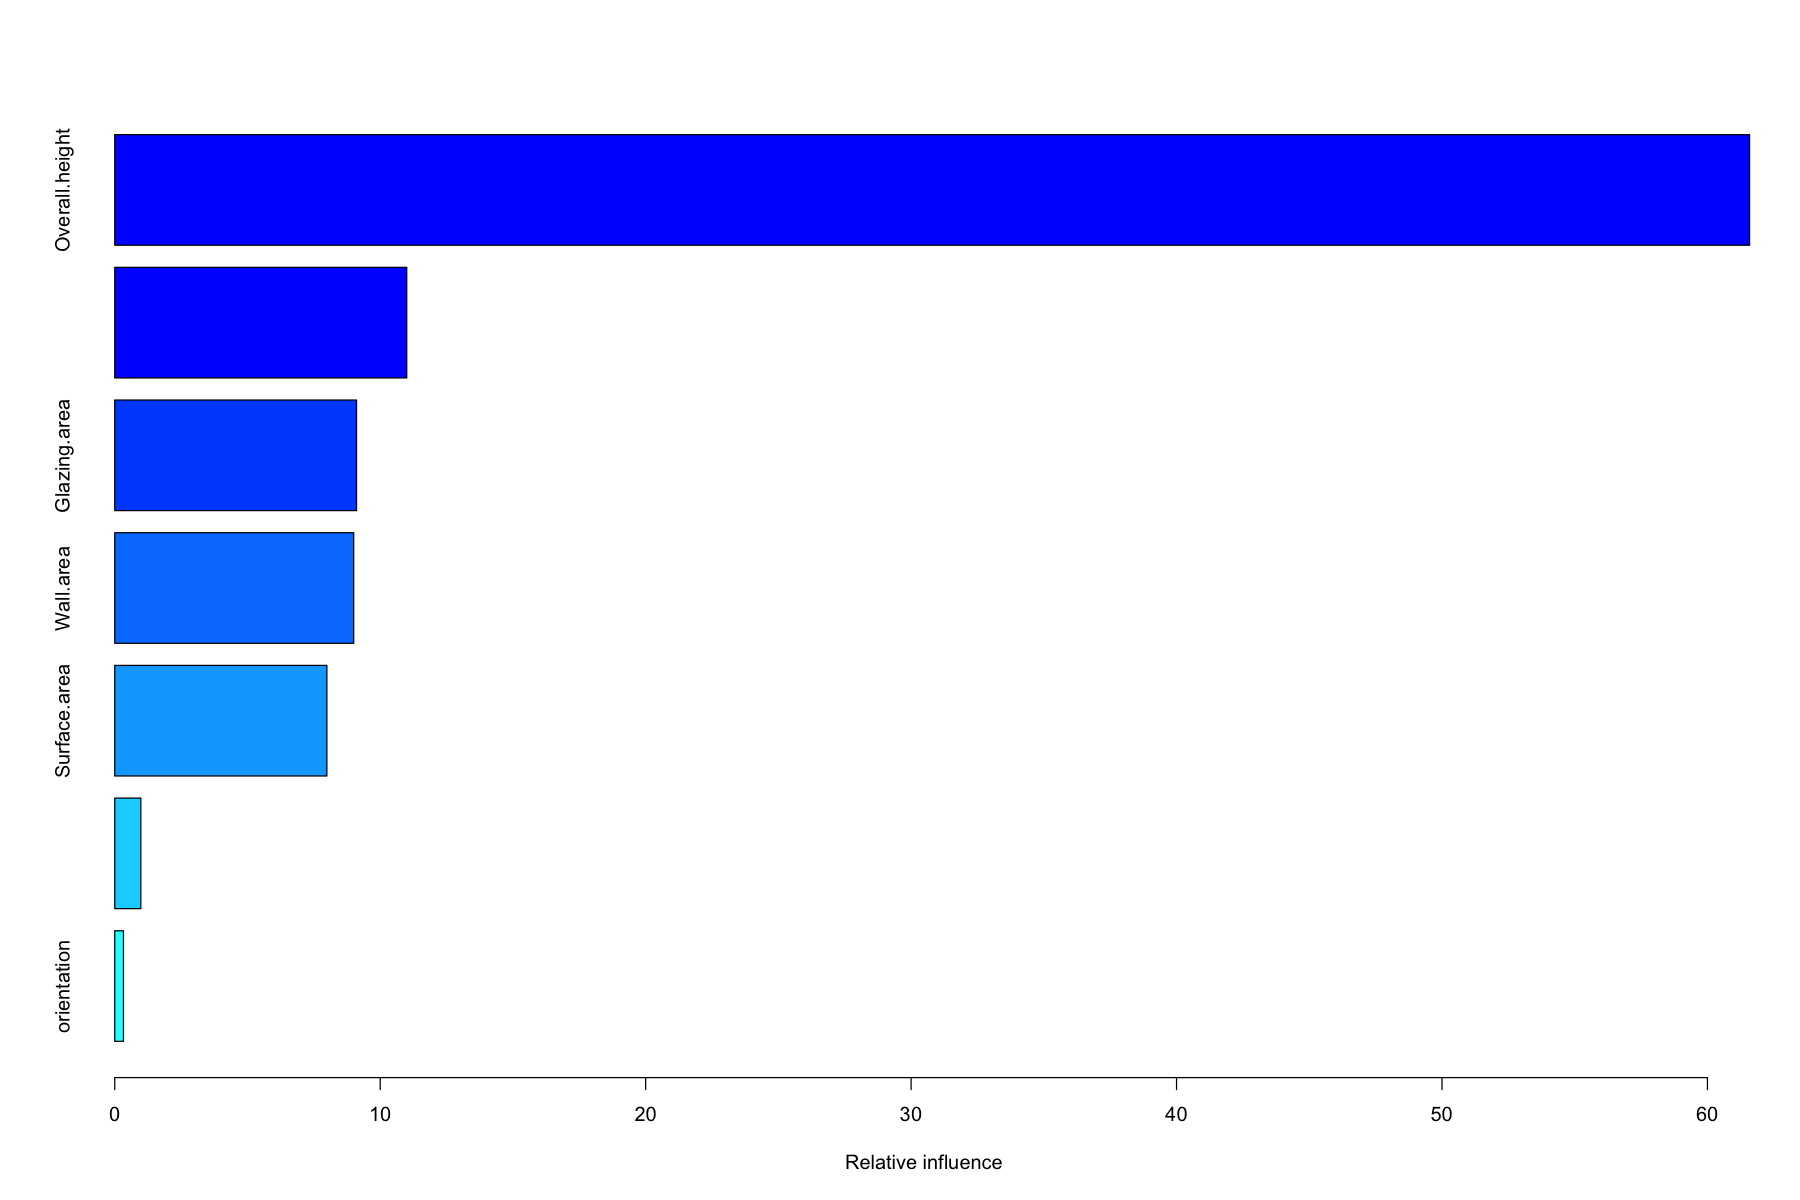

In [107]:
summary(boost.reg)

L'analyse de l'importance des variables nous permet de remarquer que la variable *Overall.height* est celle qui contribue significativement à la construction du modèle.

**Comparaison tableau discrimination et régression :**

In [ ]:
paste("Table de contingence Discrimination (avec calibration des paramètres). Accuracy = ",round(Accuracy(table.gbm.dis),3))
print(table.gbm.dis)
paste("Table de contingence Régression puis thresholding (avec calibration des paramètres). Accuracy = ",round(Accuracy(table.gbm.reg),3))
print(table.gbm.reg)

<FONT COLOR="Red">**Conclusion Boosting :** </font>

## <FONT COLOR="Red">SVM</font>

### Discrimination

In [179]:
library(e1071)

In [180]:
set.seed(101)
svm.rad.tune<-tune.svm(Energy.efficiency~.,data=datappq,kernel="radial",cost=c(1, 1.5,2,2.5,3),gamma = seq(0.1, 1, by = 0.2))
print(svm.rad.tune$best.model)


Call:
best.svm(x = Energy.efficiency ~ ., data = datappq, gamma = seq(0.1, 
    1, by = 0.2), cost = c(1, 1.5, 2, 2.5, 3), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1.5 

Number of Support Vectors:  545



In [182]:
pred.svmrad=predict(svm.rad.tune$best.model,newdata=datestq)

In [183]:
t.svmrad<-table(pred.svmrad,datestq[,"Energy.efficiency"])
print(t.svmrad)
classRate_t.svmrad <- sum(diag(t.svmrad))/sum(t.svmrad)
paste("Accuracy = ",round(classRate_t.svmrad,3))

           
pred.svmrad  A  B  C  D  E  F  G
          A 42 11  5  0  0  0  0
          B  5  5  5  0  0  0  0
          C  0  5  2  2  1  0  0
          D  0  1  0  7  3  2  0
          E  0  0  1  4 12  5  0
          F  0  0  0  1  3  9  5
          G  0  0  0  1  1  5 11


[1] "Accuracy =  0.571"

### Régression

In [2]:
#radial

In [184]:
set.seed(101)
svm.rad.tune<-tune.svm(Energy~.,data=datappr,kernel="radial",cost=c(1, 1.5,2,2.5,3),gamma = seq(0.1, 2, by = 0.2))
print(svm.rad.tune$best.model)


Call:
best.svm(x = Energy ~ ., data = datappr, gamma = seq(0.1, 2, by = 0.2), 
    cost = c(1, 1.5, 2, 2.5, 3), kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1.5 
      gamma:  0.3 
    epsilon:  0.1 


Number of Support Vectors:  454



In [185]:
fit.svmrad=predict(svm.rad.tune$best.model,data=datappr)
res.svmrad=fit.svmrad-datappr[,"Energy"]
plot.res(fit.svmrad,res.svmrad,titre="SVM noyau radial")

ERROR: Error in plot.res(fit.svmrad, res.svmrad, titre = ""): impossible de trouver la fonction "plot.res"


In [186]:
pred.svmrad=predict(svm.rad.tune$best.model,newdata=datestr)
paste("Erreur quadratique moyenne de prévision",sum((pred.svmrad-datestr[,"Energy"])^2)/nrow(datestr))

[1] "Erreur quadratique moyenne de prévision 38.3089939342299"

In [187]:
t.svmrad<-table(thresh(pred.svmrad),datestq[,"Energy.efficiency"])
print(t.svmrad)
classRate.svm.reg <- sum(diag(t.svmrad))/sum(t.svmrad)
paste("Accuracy = ",round(classRate.svm.reg,3))

   
     A  B  C  D  E  F  G
  A 40  3  3  0  0  0  0
  B  5 15  8  0  0  0  0
  C  2  3  1  1  0  0  0
  D  0  1  0  5  2  0  0
  E  0  0  1  8 12  5  0
  F  0  0  0  0  5 12  6
  G  0  0  0  1  1  4 10


[1] "Accuracy =  0.617"

**Comparaison tableau discrimination et régression :** 

In [ ]:
paste("Table de contingence Discrimination (avec calibration des paramètres). Accuracy = ",round(Accuracy(t.svmrad.dis),3))
print(t.svmrad.dis)
paste("Table de contingence Régression puis thresholding (avec calibration des paramètres). Accuracy = ",round(Accuracy(t.svmrad.reg),3))
print(t.svmrad.reg)

<FONT COLOR="Red">**Conclusion SVM :** </font>

## Comparaison des modèles 

In [199]:
#compilation sous la forme de matrice
scores_classif<-c(Accuracy(t.add),Accuracy(tabl.dis),Accuracy(table.gbm.dis),classRate_t.svmrad)
scores_reg<-c(Accuracy(t.adr),Accuracy(tabl.reg),Accuracy(table.gbm.reg),classRate.svm.reg)
sco=matrix(c(scores_classif,scores_reg),nc=4,byrow=TRUE)
colnames(sco)=c("Modèle linéaire","Modèle linéaire avec pénalité L1","Arbre de décision","Forêt aléatoire","Boosting","SVM")
rownames(sco)=c("Accuracy classification","Accuracy régression")
print(sco)

                        Arbre de décision Forêt aléatoire  Boosting       SVM
Accuracy classification         0.6688312       0.6623377 0.5974026 0.5714286
Accuracy régression             0.6493506       0.6883117 0.6948052 0.6168831


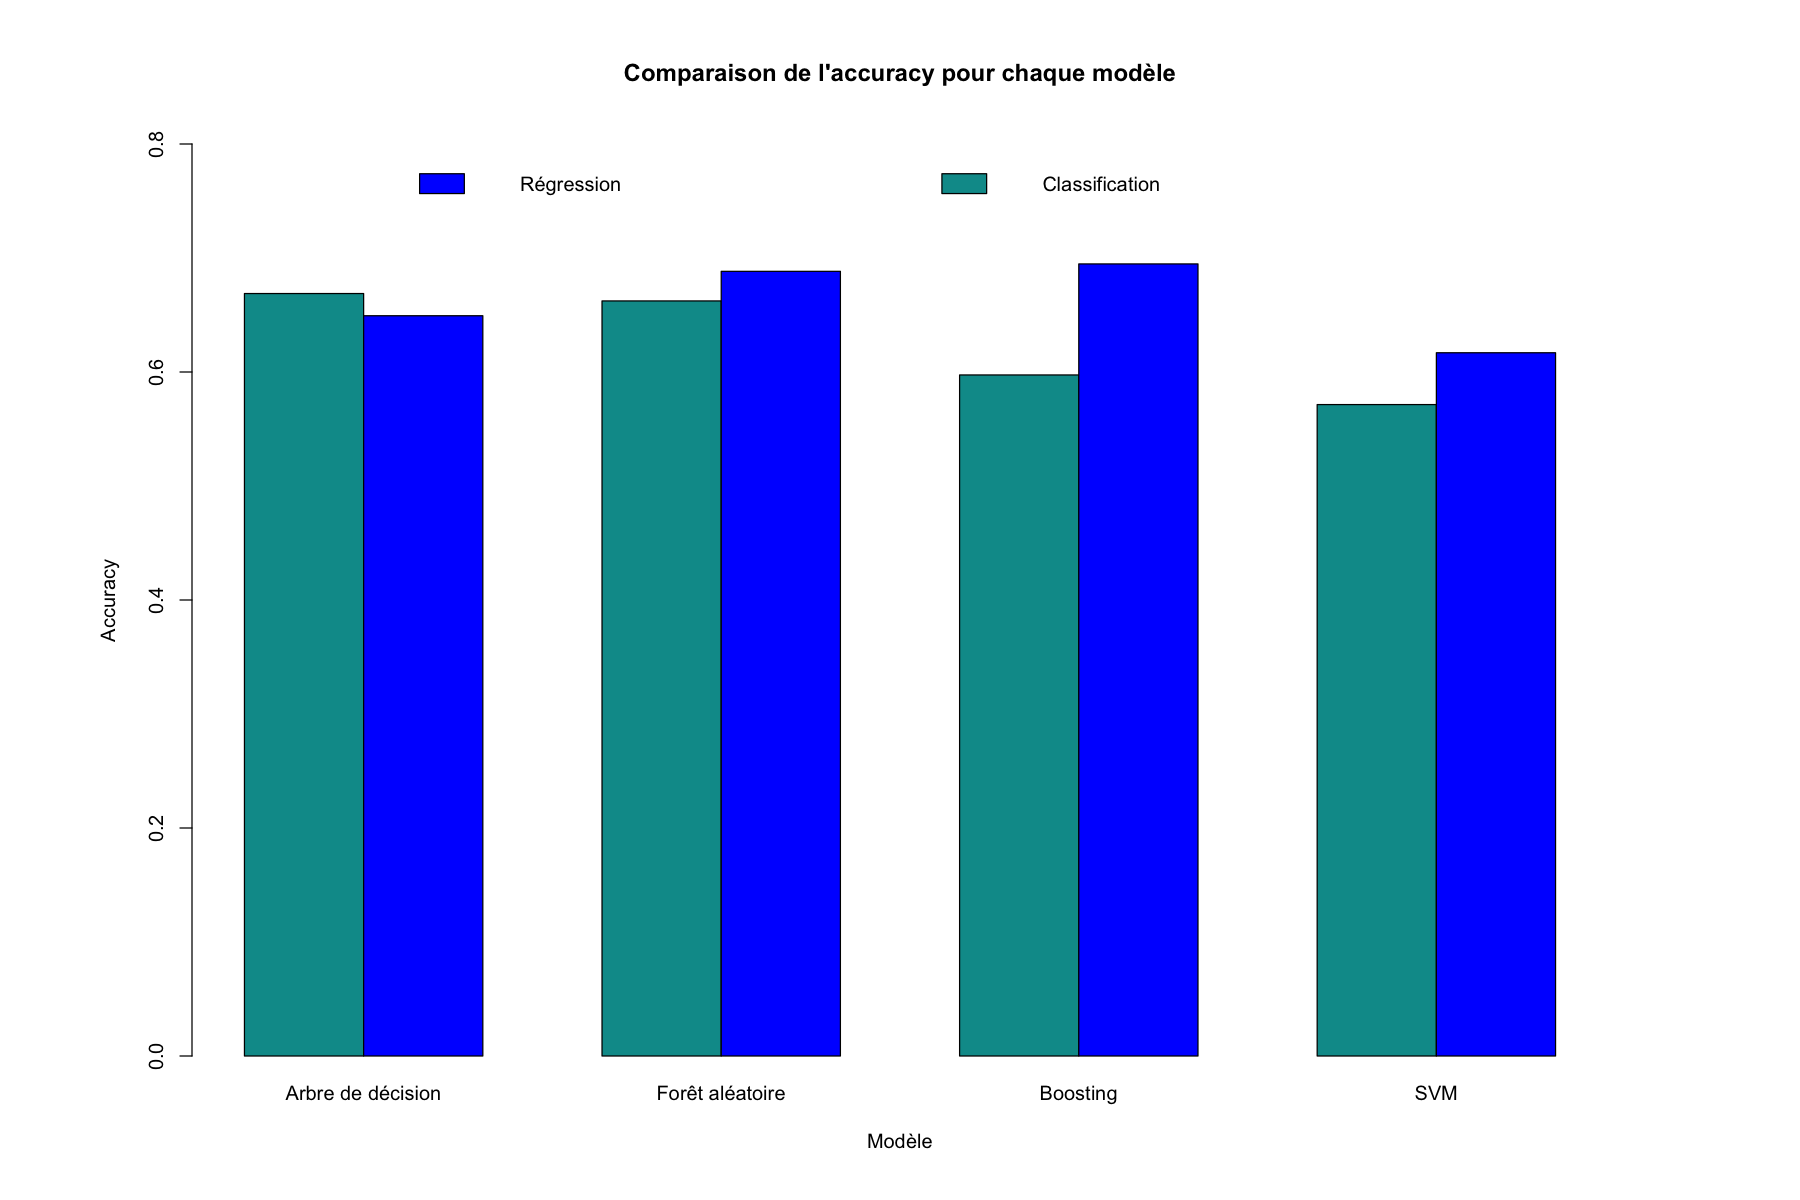

In [207]:
par(mar = c(3, 5, 3, 5)+3,xpd = TRUE)
#par(xpd=TRUE, mar=c(8,4,4,3))
barplot(height=sco,beside=TRUE,xlab="Modèle",ylim=c(0,0.8), ylab="Accuracy",col=c("#009999","#0000FF"),main="Comparaison de l'accuracy pour chaque modèle",)
legend("top", inset = c(-0.1, 0),
   legend=c("Régression","Classification"), horiz=TRUE, cex=1,fill=c("#0000FF","#009999"),box.lty=0)

Ce graphe nous permet d'observer, de manière contre-intuitive, que considérer le cas de régression et seuiller ensuite, permet d'obtenir (**dans ce problème**) une meilleure accuracy pour tous les modèles, excepté les arbres de décision. La différence d'accuracy entre régression puis seuillage et classification est beaucoup plus marquée pour le boosting. Cependant, la performance des modèles dépend fortement de l'ensemble d'apprentissage et elle a donc de très forte chance de varier. Pour pallier ce problème nous faisons tourner les modèles pour 10 itérations sans germe aléatoire, de manière à moyenner les différentes performances pour chaque modèle et ainsi étudier leur dispersion. 

In [ ]:
ad.dis.pred<-rep(0,10)
ad.reg.pred<-rep(0,10)
rf.dis.pred<-rep(0,10)
rf.reg.pred<-rep(0,10)
gbm.dis.pred<-rep(0,10)
gbm.reg.pred<-rep(0,10)
gbm.dis.pred<-rep(0,10)
svm.reg.pred<-rep(0,10)
svm.dis.pred<-rep(0,10)
for i in range(10):
    rf.dis <- train(Energy.efficiency ~ . , data=datappq, method="rf",mtry=9, ntree=500,trace = FALSE,importance=T)
    rf.reg <- train(Energy ~ . , data=datappr, method="rf",mtry=8, ntree=500,trace = FALSE,importance=T)
    rf.dis.pred[i]<-predict(rf.dis,newdata=datestq)
    rf.reg.pred[i]<-predict(rf.reg,newdata=datestr)
    svm.reg<-svm(Energy~.,data=datappr,kernel="radial",cost=1.5,gamma = 0.3)
    svm.reg.pred[i]<-predict(svm.reg,newdata=datestr)
    svm.dis<-svm(Energy.efficiency~.,data=datappq,kernel="radial",cost=1.5)
    svm.dis.pred[i]<-predict(svm.dis,newdata=datestq)
    


# Conclusion